# one-year-industrial-component-degradation

Dataset:  https://www.kaggle.com/inIT-OWL/one-year-industrial-component-degradation

        Imports

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
from numpy.random import seed
from tensorflow import set_random_seed
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json
from scipy.special import softmax

Using TensorFlow backend.


# Context
##### This dataset contains the machine data of a degrading component recorded over the duration of 12 month total. It was initiated in the European research and innovation project IMPROVE.

# Content
###### The Vega shrink-wrapper from OCME is deployed in large production lines in the food and beverage industry. The machine groups loose bottles or cans into set package sizes, wraps them in plastic film and then heat-shrinks the plastic film to combine them into a package. The plastic film is fed into the machine from large spools and is then cut to the length needed to wrap the film around a pack of goods. The cutting assembly is an important component of the machine to meet the high availability target. Therefore, the blade needs to be set-up and maintained properly. Furthermore, the blade can not be inspected visually during operation due to the blade being enclosed in a metal housing and its fast rotation speed. Monitoring the cutting blades degradation will increase the machines reliability and reduce unexpected downtime caused by failed cuts.



#### The 519 files in the dataset are of the format MM-DDTHHMMSS_NUM_modeX.csv, where MM is the month ranging from 1-12 (not calendar month), DD is the day of the month, HHMMSS is the start time of day of recording, NUM is the sample number and X is a mode ranging from 1-8. Each file is a ~8 second sample with a time resolution of 4ms that totals 2048 time-samples for every file.

#  DATA

### --pCut::Motor_Torque -> Torque in nM

### --pCut::CTRL_Position_controller::Lag_error -> Represent the instantaneous position error between the set-point from the path generator and the real current encoder position of the motor

### --pCut::CTRL_Position_controller::Actual_position -> Cutting blade position in mm

### --pCut::CTRL_Position_controller::Actual_speed -> Speed of the cutting blade

### --pSvolFilm::CTRL_Position_controller::Actual_position -> Plastic film unwinder position in mm

### --pSvolFilm::CTRL_Position_controller::Actual_speed -> Speed of the plastic film unwinder

### --pSvolFilm::CTRL_Position_controller::Lag_error -> Represent the instantaneous position error between the set-point from the path generator and the real current encoder position of the motor

### --pSpintor::VAX_speed -> VAX measurement of performance


**First things first, we have info on the samples that aren't in our sample csv files. Also, all our samples are separated in different files. So we will compile it all together to get a big dataframe with everything we need.**

In [19]:
"""
        Receives a path with all the data archives, lists the path to get a list of all filenames and then iterates through 
    all the files in the path creating a dataframe of each one. Then gets a CSV file with data about the samples
    in each files name, CSV file that was manualy formated to separate months, days, etc. Creates another dataframe with
    this filename data and last joins both file dataframe and filename dataframe to have all the info for the samples.
"""

def compile_data(path):
    
    #Lists the files in path
    files = os.listdir(path)
    
    #Creates a dataframe for the data in each files name, then labeling the data columns
    filename_df = pd.read_csv('datasets\\filename.csv', names = ['month', 'day', 'hour', 'sample_Number', 'mode'])
    
    #Initialize our big main dataframe that will join everything
    main_df = pd.DataFrame()

    #Iterates through all files in file path and counts each file
    for count, file in enumerate(files):       
        print(file)
        
        #Passing each csv data file in path to a individual dataframe
        file_df = pd.read_csv("{}\\{}".format(path,file))
        
        """
            Each row in the filename dataframe refers to a single data file in the given path, so we grab that single
        row that refers to the current file by counting each file and grabing its respective row.
        """
        #Join each file dataframe with its filename dataframe
        file_df = file_df.join(filename_df[count:count+1], how='left')
        
        #Since we grab only a row, we will have NaNs. Wich we fill with the same info of that single row
        file_df.fillna(method='ffill', inplace=True)

        #Joins each file dataframe into one 
        if main_df.empty:
            main_df = file_df
            main_df.fillna(method='ffill', inplace=True)
        else:
            main_df = main_df.append(file_df)         
            main_df.fillna(method='ffill', inplace=True)
       
    print('Compile done')
    return main_df


#   Calls the compile_data then saves the main dataframe into a csv file
def save_compiled_data(path):
    main_df = compile_data(path)
    
    #create path to the main_df csv file if it doesnt exist
    if not os.path.exists('compiled_df'):
        os.makedirs('compiled_df')
    #Saves dataframe to a csv file, removes a index
    main_df.to_csv('compiled_df//One_year_compiled.csv', index=False)
    print('Compiled and saved')
    

save_compiled_data('datasets\\one-year-industrial-component-degradation')

01-04T184148_000_mode1.csv
01-04T184424_001_mode1.csv
01-04T184835_002_mode1.csv
01-04T185047_003_mode1.csv
01-04T185257_004_mode1.csv
01-05T123134_005_mode1.csv
01-05T133345_006_mode1.csv
01-05T133550_007_mode1.csv
01-05T140727_008_mode1.csv
01-05T140919_009_mode1.csv
01-05T141105_010_mode1.csv
01-05T141248_011_mode1.csv
01-05T141453_012_mode1.csv
01-05T141642_013_mode1.csv
01-05T141834_014_mode1.csv
01-05T142025_015_mode1.csv
01-05T142208_016_mode1.csv
01-05T142356_017_mode1.csv
01-05T143934_018_mode1.csv
01-06T153013_019_mode2.csv
01-06T153154_020_mode2.csv
01-06T153358_021_mode2.csv
01-06T153535_022_mode2.csv
01-06T154219_023_mode2.csv
01-06T155351_024_mode2.csv
01-06T155536_025_mode2.csv
01-06T155724_026_mode2.csv
01-06T161307_027_mode2.csv
01-06T161505_028_mode2.csv
01-06T161647_029_mode2.csv
01-06T161827_030_mode2.csv
01-06T162017_031_mode2.csv
01-06T162156_032_mode2.csv
01-06T162354_033_mode2.csv
01-06T162627_034_mode2.csv
01-06T162807_035_mode2.csv
01-06T162949_036_mode2.csv
0

06-22T115055_304_mode2.csv
06-22T142326_305_mode2.csv
06-22T143250_306_mode2.csv
06-28T140506_307_mode6.csv
06-29T085733_308_mode1.csv
06-29T110300_309_mode1.csv
06-29T112336_310_mode1.csv
06-29T115059_311_mode1.csv
06-29T121047_312_mode1.csv
07-04T095916_313_mode2.csv
07-04T101203_314_mode2.csv
07-04T104815_315_mode2.csv
07-04T113729_316_mode2.csv
07-05T085728_317_mode1.csv
07-05T102643_318_mode1.csv
07-05T110124_319_mode1.csv
07-05T112330_320_mode1.csv
07-06T091759_321_mode1.csv
07-06T094240_322_mode1.csv
07-06T100805_323_mode1.csv
07-10T155340_324_mode1.csv
07-11T114716_325_mode1.csv
07-11T115841_326_mode1.csv
07-11T135705_327_mode1.csv
07-11T144526_328_mode1.csv
07-11T152330_329_mode1.csv
07-11T155503_330_mode1.csv
07-12T170623_331_mode1.csv
07-12T171702_332_mode1.csv
07-13T105237_333_mode6.csv
07-13T110706_334_mode6.csv
07-13T112846_335_mode6.csv
07-13T124527_336_mode6.csv
07-13T151133_337_mode6.csv
07-13T153508_338_mode6.csv
07-20T111317_339_mode5.csv
07-20T113126_340_mode5.csv
0

**Now that we have the saved file we won't need to run those functions again. Let's look into our main dataframe**

In [3]:
main_df = pd.read_csv('compiled_df//One_year_compiled.csv')
main_df.describe()

timestamp  pCut::Motor_Torque  \
count  1.062912e+06        1.062912e+06   
mean   4.102069e+00       -1.206338e-01   
std    2.364827e+00        6.078708e-01   
min    4.000000e-03       -6.560303e+00   
25%    2.056000e+00       -3.696310e-01   
50%    4.104000e+00       -1.187128e-01   
75%    6.152000e+00        2.546913e-01   
max    8.199999e+00        3.856873e+00   

       pCut::CTRL_Position_controller::Lag_error  \
count                               1.062912e+06   
mean                               -5.472746e-05   
std                                 1.212122e-01   
min                                -1.888258e+00   
25%                                -2.201461e-02   
50%                                 6.456900e-04   
75%                                 2.380830e-02   
max                                 2.021531e+00   

       pCut::CTRL_Position_controller::Actual_position  \
count                                     1.062912e+06   
mean                                      3.371415e+08   
std                                       5.466868e+08   
min                                      -2.039056e+09   
25%                                       8.626082e+07   
50%                                       1.919407e+08   
75%                                       5.691639e+08   
max                                       1.911789e+09   

       pCut::CTRL_Position_controller::Actual_speed  \
count                                  1.062912e+06   
mean                                   1.945795e+03   
std                                    4.873922e+03   
min                                   -9.482574e+03   
25%                                   -1.908875e+03   
50%                                    2.595520e+03   
75%                                    5.441666e+03   
max                                    1.792831e+04   

       pSvolFilm::CTRL_Position_controller::Actual_position  \
count                                       1.062912e+06      
mean                                        1.488169e+08      
std                                         2.711355e+08      
min                                         1.936250e+05      
25%                                         2.136702e+07      
50%                                         7.259557e+07      
75%                                         1.602507e+08      
max                                         1.453671e+09      

       pSvolFilm::CTRL_Position_controller::Actual_speed  \
count                                       1.062912e+06   
mean                                        5.367032e+03   
std                                         3.382194e+03   
min                                        -2.013385e+01   
25%                                         3.032669e+03   
50%                                         4.582979e+03   
75%                                         5.823731e+03   
max                                         1.797202e+04   

       pSvolFilm::CTRL_Position_controller::Lag_error  pSpintor::VAX_speed  \
count                                    1.062912e+06         1.062912e+06   
mean                                     9.847591e-01         1.927328e+03   
std                                      3.437204e-01         6.559047e+02   
min                                     -9.143658e-01         0.000000e+00   
25%                                      8.384416e-01         1.500000e+03   
50%                                      9.711797e-01         1.800000e+03   
75%                                      1.105926e+00         2.280000e+03   
max                                      3.567880e+00         3.600000e+03   

               month            day           hour  sample_Number  
count  928491.000000  928491.000000  928491.000000   928491.00000  
mean        4.983090      16.374244  136214.317192      246.45296  
std         3.457797       8.514075   32483.732147      149.29589  
min         1.000000       1.000000   81158.000000

**Let's look for correlation between data. As you will see, the only things that look correlated is the Motor Torque, Blade Speed and the Blade Lag Error, also the VAX speed and wrapper speed. Excluding of course, month and sample_number, and all self correlations on the diagonal.**

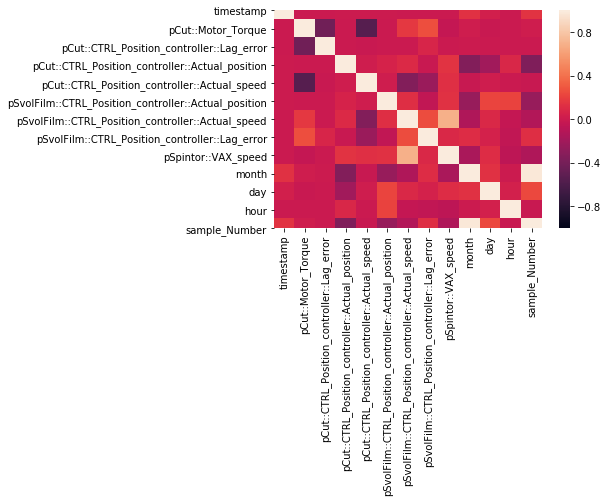

In [4]:
#heatmap of correlations from -1 to 1
sns.heatmap(main_df.corr(), vmin= -1, vmax = 1)

**Lets drop some columns and flip our motor torque column values by multiplying it by -1. Just for some more visual understanding**

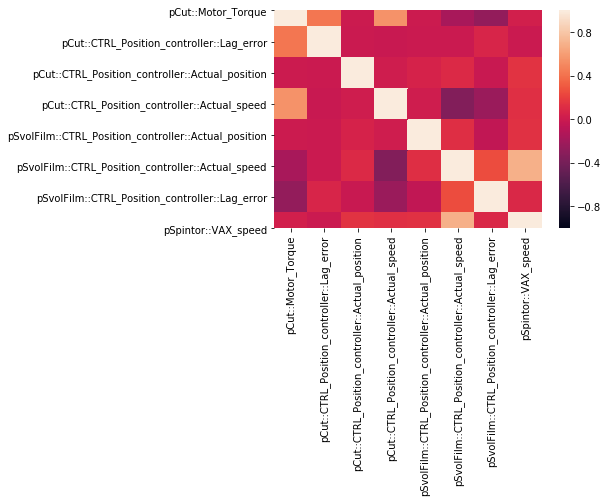

In [5]:
main_df = pd.read_csv('compiled_df//One_year_compiled.csv')
#Dropping nonsense columns for this proposal                                 (axis=1) = columns
main_df = main_df.drop(['day', 'hour', 'sample_Number', 'month', 'timestamp'], axis=1)
#Flipping column values
main_df['pCut::Motor_Torque'] = main_df['pCut::Motor_Torque'] *-1
#Heatmap
sns.heatmap(main_df.corr(), vmin= -1, vmax = 1)


## Treating non-numerical data

**In our dataset, the modes for the machine may influence in data patterns, so we need to transform that data from string to numerical classes. This function will do just that.** 

In [7]:
def handle_non_numeric(df):
    # Values in each column for each column
    columns = df.columns.values
    
    for column in columns:
        
        # Dictionary with each numerical value for each text
        text_digit_vals = {}
        
        # Receives text to convert to a number
        def convert_to_int (val):
            
            # Returns respective numerical value for class
            return text_digit_vals[val]
        
        # If values in columns are not float or int
        if df[column].dtype !=np.int64 and df[column].dtype != np.float64:
            
            # Gets values form current column
            column_contents = df[column].values.tolist()
            
            # Gets unique values from current column
            unique_elements = set(column_contents)
            
            # Classification starts at 0
            x=0
            
            for unique in unique_elements:
                
                # Adds the class value for the text in dictionary, if it's not there
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            
            # Maps the numerical values to the text values in columns 
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

# Approach

**A few algorithms will be ested to see if we can get some info on the machine. We will use OneClass SVM and KMeans with 1 cluster to try clustering. After that we will try an Autoencoder to try and reproduce data based on the machines healthy condition.**

**In all 3 cases we will grab a slice of the first rows and consider it as the Healthy State of the machine, then feed it to the algorithms. After that we will give the algorithms the entirety of the dataset and see how they perform on the rest of the data. Deviations, low socres, and high losses will be considered as anomalies to be studied.**

# OneClass SVM approach

**OneClass SVM is used for outlier detection, it tries to find 2 classes in the data, the "normal" class and the outliers. We will use the SVM to try and find outliers and anomalies.**

In [43]:
#Grabbing the entire dataset
main_df = pd.read_csv('compiled_df//One_year_compiled.csv')
#Dropping columns with unwanted/irrelevant info for the algorithm
main_df = main_df.drop(['day', 'hour', 'sample_Number', 'month', 'timestamp'], axis=1)
#Transforming modes into classified data
main_df = handle_non_numeric(main_df)

#Passing our dataframe as our features
X = main_df

#Defining preprocessor for the data
scaler = preprocessing.MinMaxScaler()
#Preprocessing
X = pd.DataFrame(scaler.fit_transform(X), 
                              columns=X.columns, 
                              index=X.index)


#Scaling
X = preprocessing.scale(X)
#Splitting the feature data for training data. First 200.000 rows.
X_train = X[:200000]


#Creating a fitting OneClass SVM
ocsvm = OneClassSVM(nu=0.25, gamma=0.05)
ocsvm.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
            max_iter=-1, nu=0.25, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

**Predicting and classifying the dataset in anomalies and non-anomalies, then passing it to a dataframe.**

In [ ]:


df=main_df.copy()
df['anomaly'] = pd.Series(ocsvm.predict(X))



**Saving Dataframe**

In [45]:
#Saving Dataframe.
df.to_csv('compiled_df//Labled_df.csv')

**Reading into dataframe**

In [9]:
#Reading into dataframe
df = pd.read_csv('compiled_df//Labled_df.csv', index_col=0)
df.head()

pCut::Motor_Torque  pCut::CTRL_Position_controller::Lag_error  \
0            0.199603                                   0.027420   
1            0.281624                                   0.002502   
2            0.349315                                  -0.018085   
3            0.444450                                  -0.054680   
4            0.480923                                  -0.042770   

   pCut::CTRL_Position_controller::Actual_position  \
0                                        628392628   
1                                        628392625   
2                                        628392621   
3                                        628392617   
4                                        628392613   

   pCut::CTRL_Position_controller::Actual_speed  \
0                                   -920.104980   
1                                   -937.271118   
2                                   -951.004028   
3                                  -1019.668579   
4                                  -1023.101807   

   pSvolFilm::CTRL_Position_controller::Actual_position  \
0                                            5298555      
1                                            5298565      
2                                            5298575      
3                                            5298585      
4                                            5298595      

   pSvolFilm::CTRL_Position_controller::Actual_speed  \
0                                        2441.235352   
1                                        2453.819092   
2                                        2476.469727   
3                                        2501.637207   
4                                        2519.254395   

   pSvolFilm::CTRL_Position_controller::Lag_error  pSpintor::VAX_speed  mode  \
0                                        0.899543          1379.999756     2   
1                                        0.874072          1379.999756     2   
2                                        0.879806          1379.999756     2   
3                                        0.837500          1379.999756     2   
4                                        0.905347          1379.999756     2   

   anomaly  
0        1  
1        1  
2        1  
3        1  
4        1

**Visualizing anomalies**

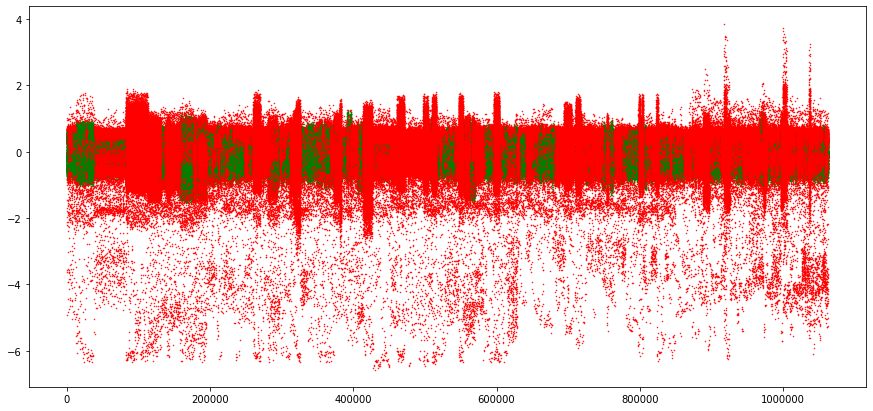

In [47]:
#Getting labled groups
scat_1 = df.groupby('anomaly').get_group(1)
scat_0 = df.groupby('anomaly').get_group(-1)

# Plot size
plt.subplots(figsize=(15,7))

# Plot group 1 -labeled, color green, point size 1
plt.plot(scat_1.index,scat_1['pCut::Motor_Torque'], 'g.', markersize=1)

# Plot group -1 -labeled, color red, point size 1
plt.plot(scat_0.index, scat_0['pCut::Motor_Torque'],'r.', markersize=1)


**Visualizing scores for the whole dataset**

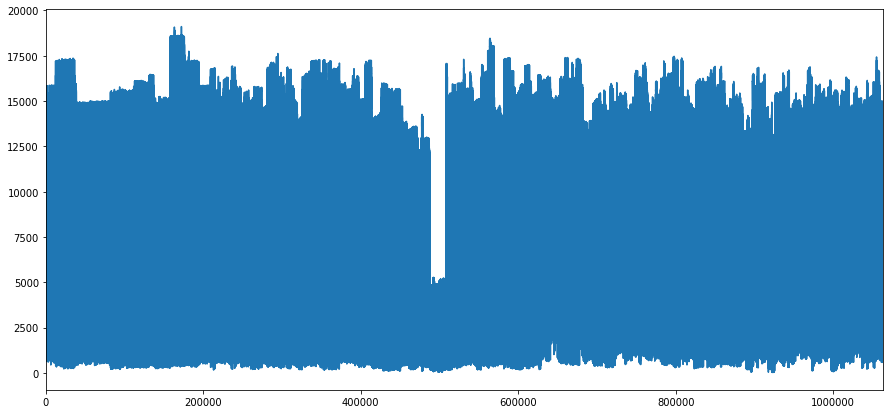

In [48]:
#Creating a dataframe for the score of each data sample
score = pd.DataFrame()
#Returning scores for the dataset
score['score'] = ocsvm.score_samples(X)

#Plot size
plt.subplots(figsize=(15,7))
#Plotting
score['score'].plot()
#Saving score dataframe
score.to_csv('compiled_df//SVM_Score.csv')

**Inverted score moving mean**

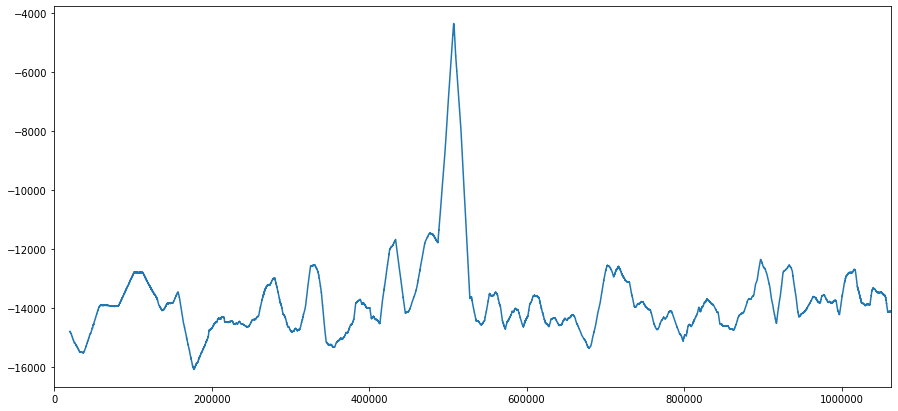

In [49]:
fig, ax = plt.subplots(figsize=(15,7))


((score['score'].rolling(20000).mean())*-1).plot(ax=ax)

**Scat plot to see the score through the noise**

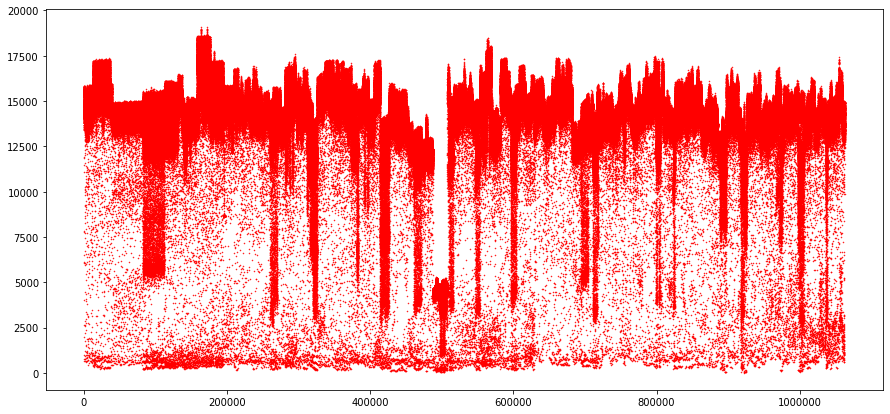

In [51]:
plt.subplots(figsize=(15,7))
plt.plot(score.index, score['score'],'r.', markersize=1)

# KMeans approach

**Kmeans approach will do the same thing as the OC-SVM**

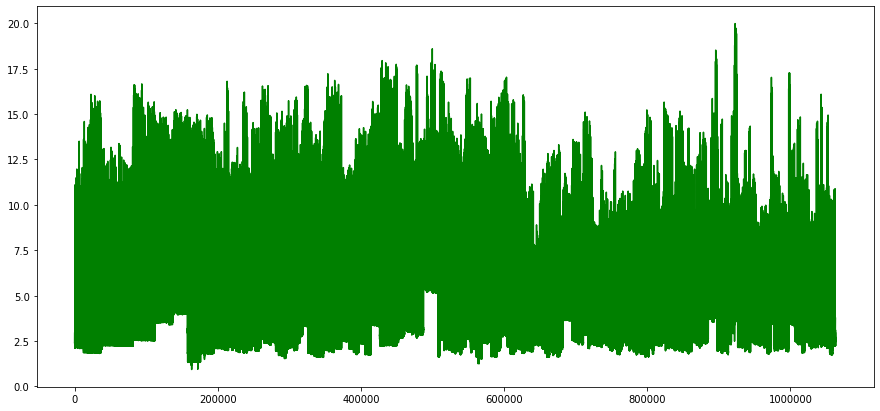

In [23]:
#------ Preparing features for training and future prediction -----
main_df = pd.read_csv('compiled_df//One_year_compiled.csv')
main_df = main_df.drop(['day', 'hour', 'sample_Number', 'month', 'timestamp'], axis=1)
main_df = handle_non_numeric(main_df)
X = main_df

scaler = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), 
                              columns=X.columns, 
                              index=X.index)



X = preprocessing.scale(X)
#-------------------------------------------------------------------


#Percentage of the data that will be considered healthy condition
train_percentage = 0.15
#Integer value for the slice that will be considered healthy condition
train_size = int(len(main_df.index)*train_percentage)
#Grabbing slice for training data
X_train = X[:train_size]


#Defining KMeans with 1 cluster
kmeans = KMeans(n_clusters=1)
#Fitting the algorithm
kmeans.fit(X_train)

#Creating a copy of the main dataset
k_anomaly = main_df.copy()

#Dataframe now will receive the distance of each data sample from the cluster
k_anomaly = pd.DataFrame(kmeans.transform(X))

#Saving cluster distane into csv file
k_anomaly.to_csv('compiled_df//KM_Distance.csv')

#Plot
plt.subplots(figsize=(15,7))

plt.plot(k_anomaly.index, k_anomaly[0], 'g', markersize=1)

# AutoEncoder approach

**AutoEncodersare Neural nets that expandes and compresses data into higher and lower dimensions, then tries to recreate the data. The idea is that the autoencoder will understand the relation between the features and from that, it will recreate the exact data it was given.**

**We will feed the algorithm the healthy state of the machine. As it tries to rebuild the rest of the data as the healthy state, reconstruction loss, difference between predicted machine data and real machine data, will be considered "unhealthy" state.**

In [16]:
#------------------------- Preparing data for training --------------------------- 
main_df = pd.read_csv('compiled_df//One_year_compiled.csv')
main_df = main_df.drop(['day', 'hour', 'sample_Number', 'month', 'timestamp'], axis=1)
main_df = handle_non_numeric(main_df)
X = main_df

scaler = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), 
                              columns=X.columns, 
                              index=X.index)



X = preprocessing.scale(X)


train_percentage = 0.15
train_size = int(len(main_df.index)*train_percentage)

X_train = X[:train_size]
#----------------------------------------------------------------------------------



#Seed for random batch validation and training
seed(10)
set_random_seed(10)

#Elu activatoin function
act_func = 'elu'

# Input layer
model=Sequential()

# First hidden layer, connected to input vector X. 
model.add(Dense(50,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )
# Second hidden layer
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))
# Thrid hidden layer
model.add(Dense(50,activation=act_func,
                kernel_initializer='glorot_uniform'))

# Input layer
model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

# Loss function and Optimizer choice
model.compile(loss='mse',optimizer='adam')

# Train model for 50 epochs, batch size of 200 
NUM_EPOCHS=50
BATCH_SIZE=200

#Grabbing validation and training loss over epochs
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1)


Train on 143492 samples, validate on 15944 samples
Epoch 1/50
143492/143492 [==============================] - 11s 73us/step - loss: 0.0924 - val_loss: 0.0118
Epoch 2/50
143492/143492 [==============================] - 4s 31us/step - loss: 0.0027 - val_loss: 0.0083
Epoch 3/50
143492/143492 [==============================] - 4s 31us/step - loss: 0.0012 - val_loss: 0.0078
Epoch 4/50
143492/143492 [==============================] - 5s 37us/step - loss: 7.0614e-04 - val_loss: 0.0059
Epoch 5/50
143492/143492 [==============================] - 5s 37us/step - loss: 4.8434e-04 - val_loss: 0.0051
Epoch 6/50
143492/143492 [==============================] - 6s 45us/step - loss: 3.6166e-04 - val_loss: 0.0043
Epoch 7/50
143492/143492 [==============================] - 7s 47us/step - loss: 2.7945e-04 - val_loss: 0.0037
Epoch 8/50
143492/143492 [==============================] - 4s 29us/step - loss: 2.2540e-04 - val_loss: 0.0032
Epoch 9/50
143492/143492 [==============================] - 4s 29us/step

**Plotting Validation loss and Training loss over the epochs**

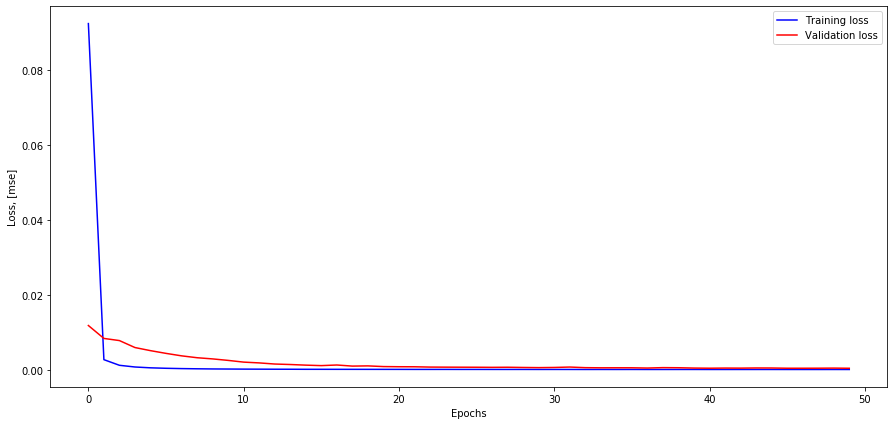

In [17]:
plt.subplots(figsize=(15,7))

plt.plot(history.history['loss'],'b',label='Training loss')
plt.plot(history.history['val_loss'],'r',label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')

plt.show()

**Now we will feed the algortihm the same training data, and make it try to reconstruct data. We will then see the distribution of the loss over the train data, further on we will use this distribution to determine some Thresholds.**

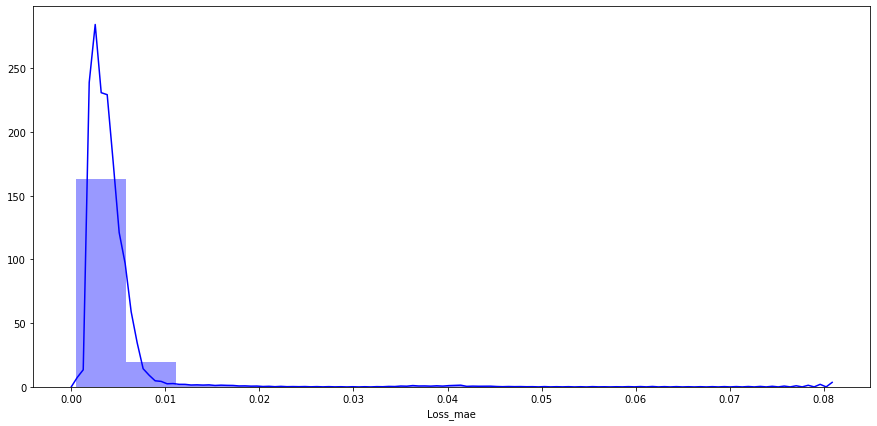

In [24]:
#Reconstructing train data
X_pred = model.predict(np.array(X_train))

#Creating dataframe for reconstructed data
X_pred = pd.DataFrame(X_pred,columns=main_df.columns)
X_pred.index = pd.DataFrame(X_train).index

#Dataframe to get the difference of predicted data and real data. 
scored = pd.DataFrame(index=pd.DataFrame(X_train).index)
#Returning the mean of the loss for each column
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)

#plot
plt.subplots(figsize=(15,7))
sns.distplot(scored['Loss_mae'],
             bins = 15, 
             kde= True,
            color = 'blue');





**Now to do the same thing but with all our data to see the loss over time, this will give us interesting data.**

Text(0, 0.5, 'Loss, [mse]')

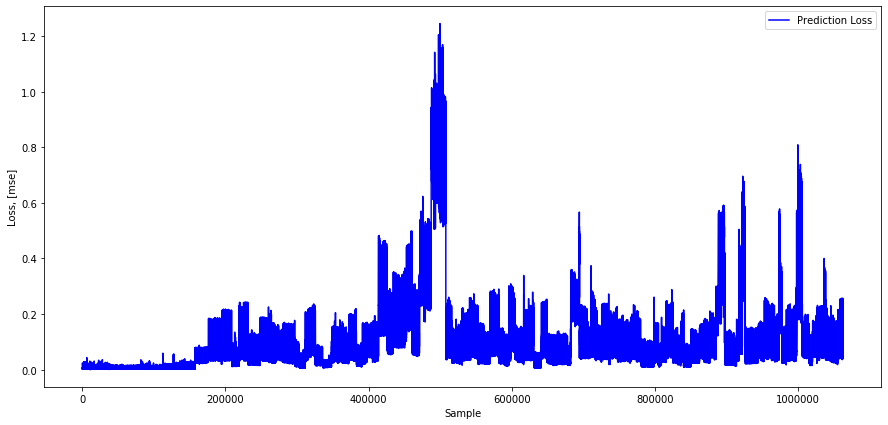

In [19]:

#Reconstructing full data
X_pred = model.predict(np.array(X))
X_pred = pd.DataFrame(X_pred,columns=main_df.columns)
X_pred.index = pd.DataFrame(X).index

#Returning mean of the losses for each column and putting it in a dataframe
scored = pd.DataFrame(index=pd.DataFrame(X).index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X), axis = 1)

#Plot size
plt.subplots(figsize=(15,7))


#Saving dataframe
scored.to_csv('compiled_df//AutoEncoder_loss.csv')

#Plot
plt.plot(scored['Loss_mae'],'b',label='Prediction Loss')

plt.legend(loc='upper right')
plt.xlabel('Sample')
plt.ylabel('Loss, [mse]')

# Results Analysis

### Scatter plot for each algorithm scoring, to see through noise.

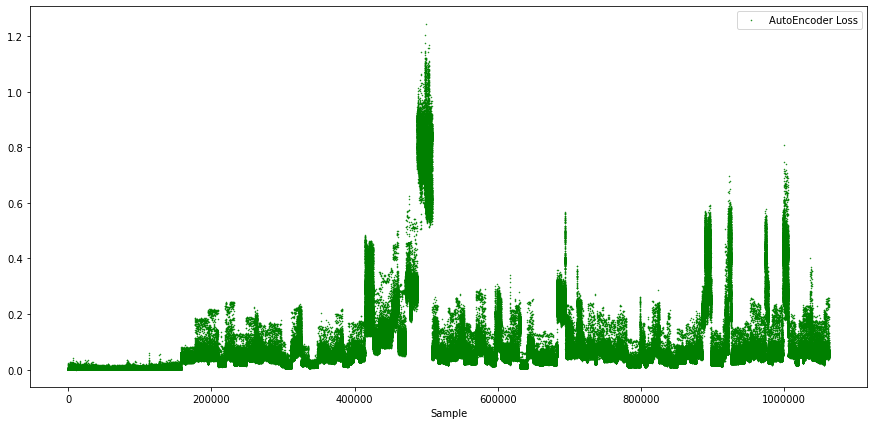

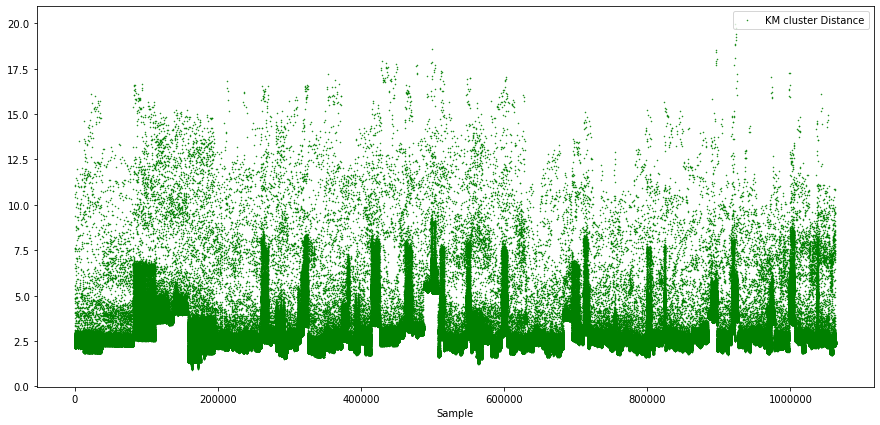

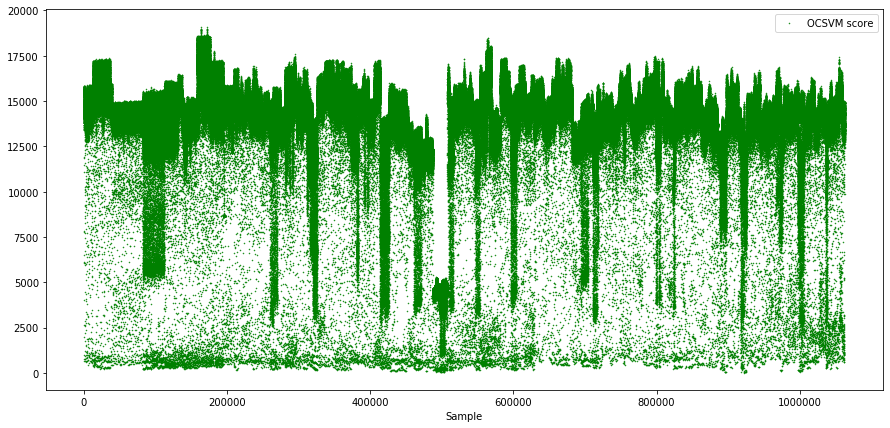

In [25]:
#Plot size
plt.subplots(figsize=(15,7))
#Reading loss csv file
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')
#Plot
plt.plot(enc_loss.index,enc_loss['Loss_mae'], 'g.', markersize=1,label="AutoEncoder Loss")
#Labels and legends
plt.legend(loc='upper right')
plt.xlabel('Sample')
#Show plot
plt.show()

plt.subplots(figsize=(15,7))
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
plt.plot(k_anomaly.index,k_anomaly['0'], 'g.', markersize=1,label="KM cluster Distance")
plt.legend(loc='upper right')
plt.xlabel('Sample')
plt.show()

plt.subplots(figsize=(15,7))
score = pd.read_csv('compiled_df//SVM_Score.csv')
plt.plot(score.index,score['score'], 'g.', markersize=1,label="OCSVM score")
plt.legend(loc='upper right')
plt.xlabel('Sample')
plt.show()


**Plotting each algorithm scoring together, with OCSVM flipped over 0.**

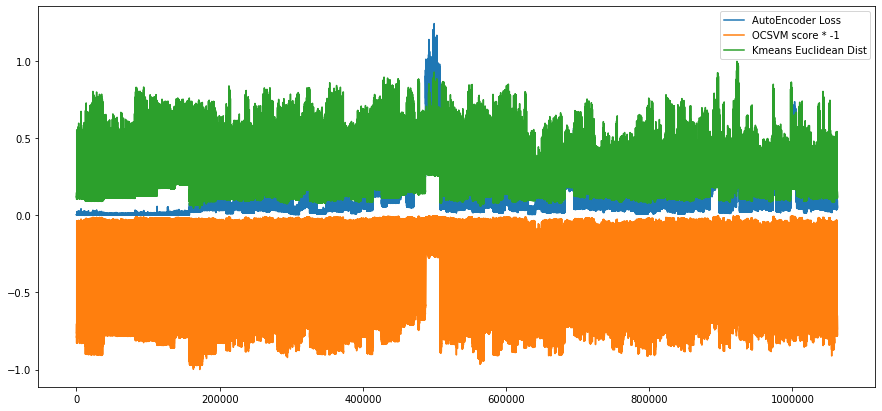

In [11]:
#Plot size
plt.subplots(figsize=(15,7))

#Reading each socring csv file
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

#Scaling data for vizualization
k_distance = k_anomaly/k_anomaly.max()
svm_score = (score/score.max())*-1

plt.plot(enc_loss.index,enc_loss['Loss_mae'], label="AutoEncoder Loss")
plt.plot(svm_score.index, svm_score['score'],label="OCSVM score")
plt.plot(k_distance.index,k_distance['0'], label="Kmeans Euclidean Dist")



plt.gca().legend(('AutoEncoder Loss','OCSVM score * -1','Kmeans Euclidean Dist'))


**Looking for correlation between the algorithms**

In [27]:
#Reading score files
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

# Dataframe to see correlation
corr = pd.DataFrame()

#Passing score data to corr dataframe 
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']

#Seeing correlation
corr.corr()

SVM_score  KM_cluster_distance  AutoEnc_loss
SVM_score             1.000000            -0.879424     -0.616682
KM_cluster_distance  -0.879424             1.000000      0.454552
AutoEnc_loss         -0.616682             0.454552      1.000000

**Scatter plot with movving mean**

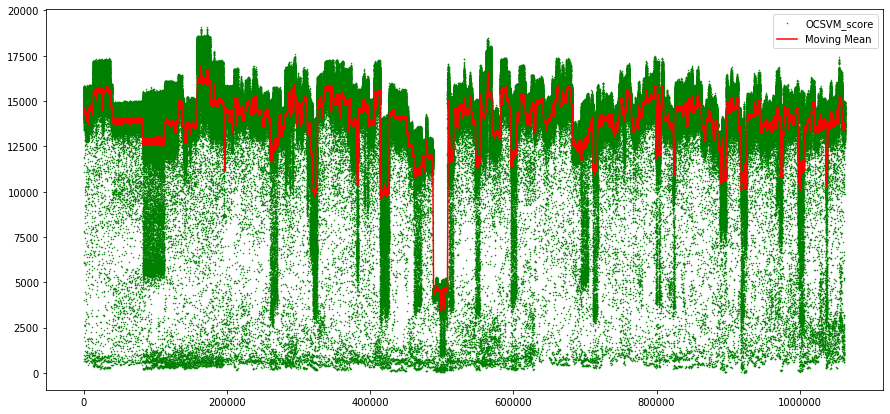

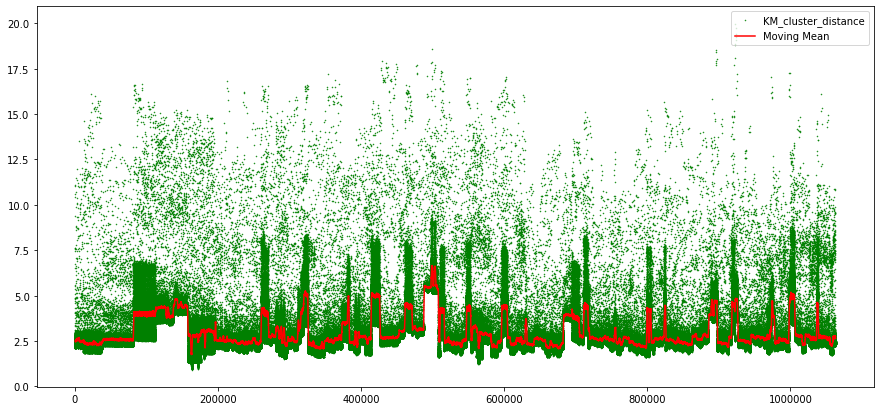

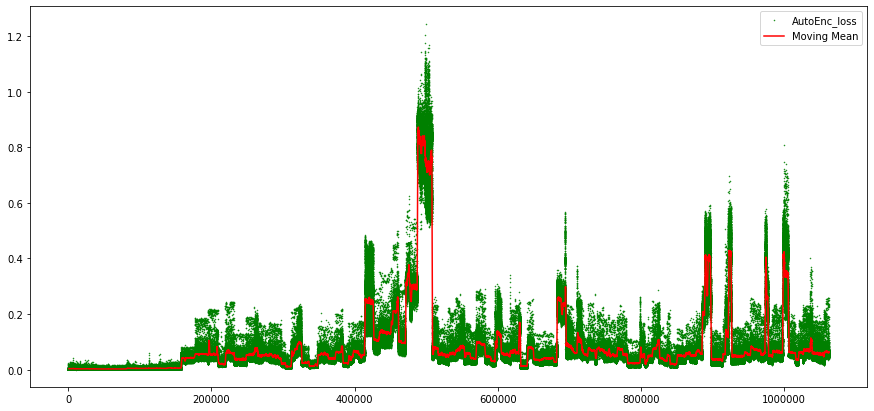

In [31]:
#---- Reading data and passing it to dataframe again ----- 

k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']
#---------------------------------------------------------


#Plot size
plt.subplots(figsize=(15,7))

#Scatter plot of SVM score
plt.plot(corr.index, corr['SVM_score'], 'g.', markersize=1, label = 'OCSVM_score')
#Plotting moving mean of 1000 data points
plt.plot(corr.index, corr['SVM_score'].rolling(1000).mean(), 'r', markersize=1, label = 'Moving Mean')
#Legend
plt.legend(loc='upper right')
#Show
plt.show()


plt.subplots(figsize=(15,7))
  
plt.plot(corr.index, corr['KM_cluster_distance'], 'g.', markersize=1, label = 'KM_cluster_distance')
plt.plot(corr.index, corr['KM_cluster_distance'].rolling(1000).mean(), 'r', markersize=1, label = 'Moving Mean')

plt.legend(loc='upper right')
plt.show()





plt.subplots(figsize=(15,7))
  
plt.plot(corr.index, corr['AutoEnc_loss'], 'g.', markersize=1, label = 'AutoEnc_loss')
plt.plot(corr.index, corr['AutoEnc_loss'].rolling(1000).mean(), 'r', markersize=1, label = 'Moving Mean')


plt.legend(loc='upper right')
plt.show()



**Loss Distribution over training data**

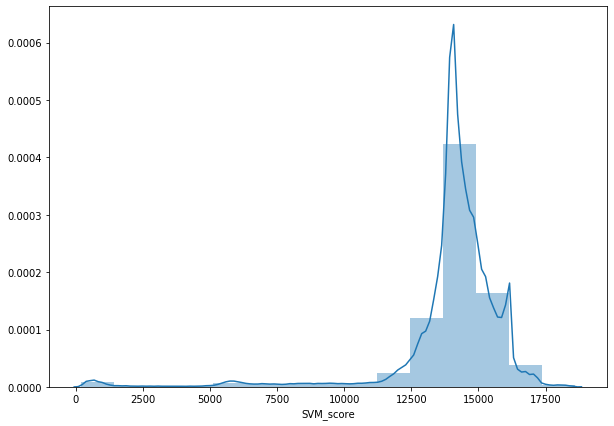

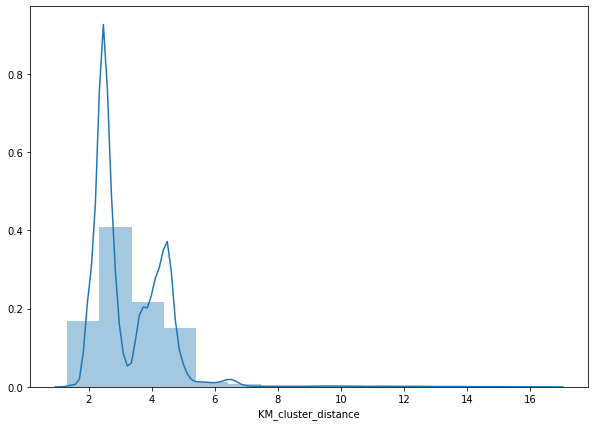

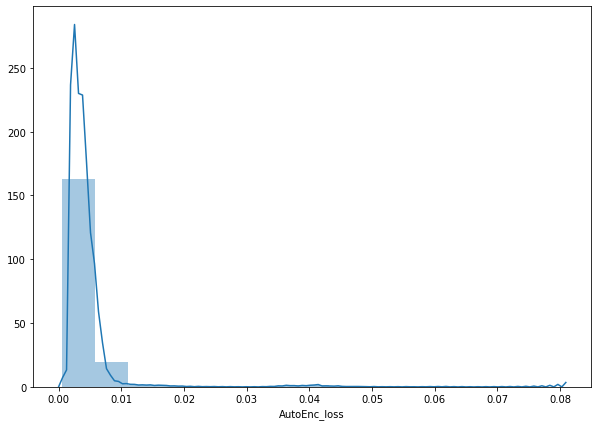

In [33]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance')
score = pd.read_csv('compiled_df//SVM_Score')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']



#Plot size
plt.subplots(figsize=(10,7))
#Hist plot of first 160.000 rows, 15 bins
sns.distplot(corr['SVM_score'].head(160000), bins=15)
#Show
plt.show()

plt.subplots(figsize=(10,7))
sns.distplot(corr['KM_cluster_distance'].head(160000),bins=15)
plt.show()

plt.subplots(figsize=(10,7))
sns.distplot(corr['AutoEnc_loss'].head(160000),bins=15)
plt.show()

**Loss distribution over entire dataset**

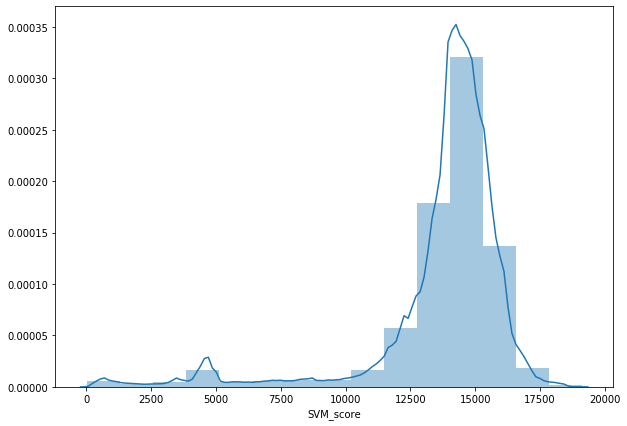

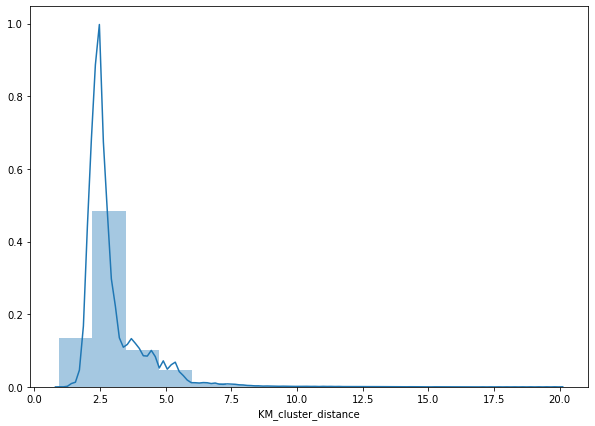

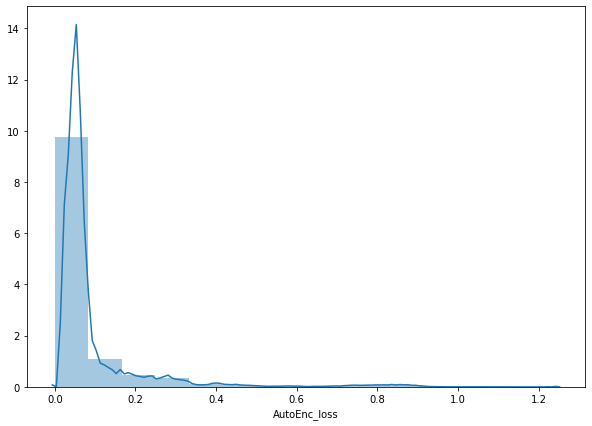

In [35]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']





plt.subplots(figsize=(10,7))
sns.distplot(corr['SVM_score'], bins=15)
plt.show()

plt.subplots(figsize=(10,7))
sns.distplot(corr['KM_cluster_distance'],bins=15)
plt.show()

plt.subplots(figsize=(10,7))
sns.distplot(corr['AutoEnc_loss'],bins=15)
plt.show()

**Now we will use the info on the Training Loss distribution to determine some thresholds for the graphs. Moving means will also be plotted.**

**_Upper threshold = Highest values of training loss distribution_**

**_Lower threshold = Lowest values of training loss distribution_**

**_Highes density = Mode of training loss distribution_**

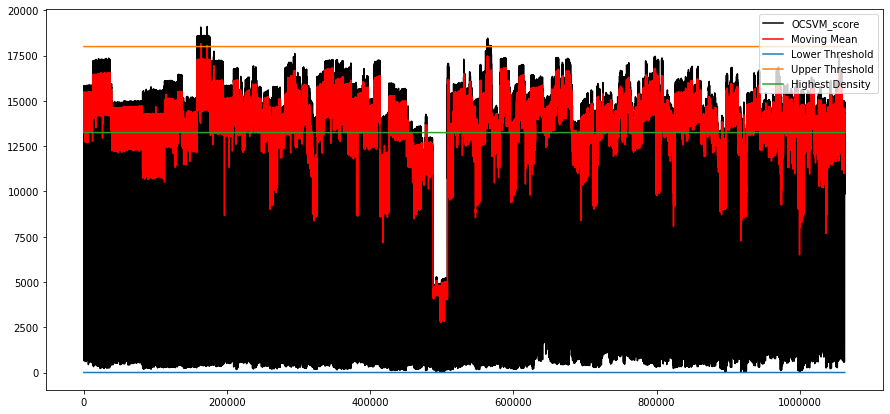

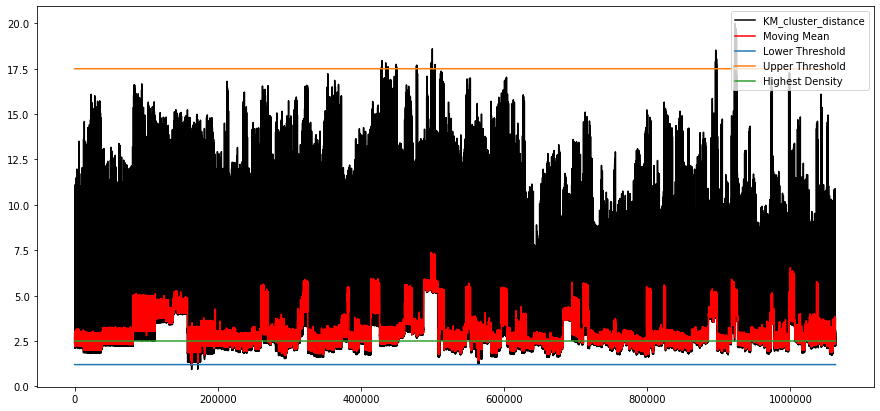

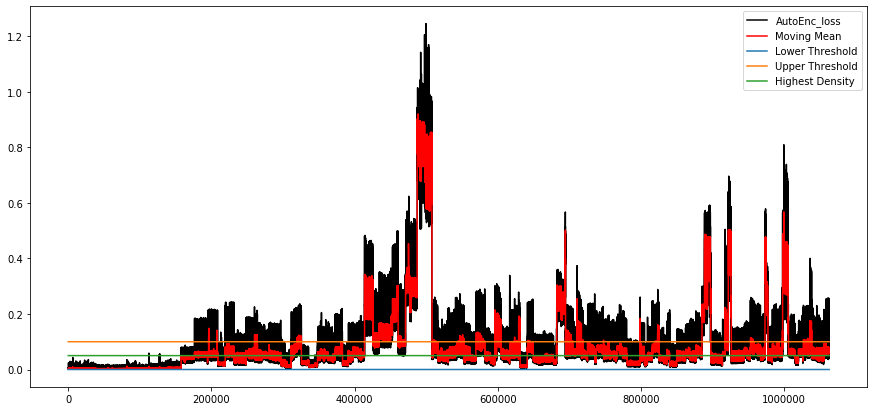

In [12]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']



#Creating an array for the thresholds to be plotted over the entire dataset
lower_threshold = np.full((corr['SVM_score'].size, 1), 0)
upper_threshold = np.full((corr['SVM_score'].size, 1), 18000)
high_density_threshold = np.full((corr['SVM_score'].size, 1), 13250)

#Plot size
plt.subplots(figsize=(15,7))

#Score Plot
plt.plot(corr.index, corr['SVM_score'], 'k', markersize=1, label = 'OCSVM_score')
#Moving mean plot
plt.plot(corr.index, corr['SVM_score'].rolling(100).mean(), 'r', markersize=1, label = 'Moving Mean')
#Threshold plots
plt.plot(corr.index, lower_threshold, label='Lower Threshold')
plt.plot(corr.index, upper_threshold, label = 'Upper Threshold')
plt.plot(corr.index, high_density_threshold, label = 'Highest Density')
plt.legend(loc='upper right')
#Show
plt.show()


lower_threshold = np.full((corr['KM_cluster_distance'].size, 1), 1.2)
upper_threshold = np.full((corr['KM_cluster_distance'].size, 1), 17.5)
high_density_threshold = np.full((corr['KM_cluster_distance'].size, 1), 2.5)

plt.subplots(figsize=(15,7))
  
plt.plot(corr.index, corr['KM_cluster_distance'], 'k', markersize=1, label = 'KM_cluster_distance')
plt.plot(corr.index, corr['KM_cluster_distance'].rolling(100).mean(), 'r', markersize=1, label = 'Moving Mean')
plt.plot(corr.index, lower_threshold, label='Lower Threshold')
plt.plot(corr.index, upper_threshold, label = 'Upper Threshold')
plt.plot(corr.index, high_density_threshold, label = 'Highest Density')
plt.legend(loc='upper right')
plt.show()



lower_threshold = np.full((corr['AutoEnc_loss'].size, 1), 0)
upper_threshold = np.full((corr['AutoEnc_loss'].size, 1), 0.1)
high_density_threshold = np.full((corr['AutoEnc_loss'].size, 1), 0.05)

plt.subplots(figsize=(15,7))
  
plt.plot(corr.index, corr['AutoEnc_loss'], 'k', markersize=1, label = 'AutoEnc_loss')
plt.plot(corr.index, corr['AutoEnc_loss'].rolling(100).mean(), 'r', markersize=1, label = 'Moving Mean')
plt.plot(corr.index, lower_threshold, label='Lower Threshold')
plt.plot(corr.index, upper_threshold, label = 'Upper Threshold')
plt.plot(corr.index, high_density_threshold, label = 'Highest Density')
plt.legend(loc='upper right')
plt.show()


**Scatter plot of the algorithm scores vs each other**

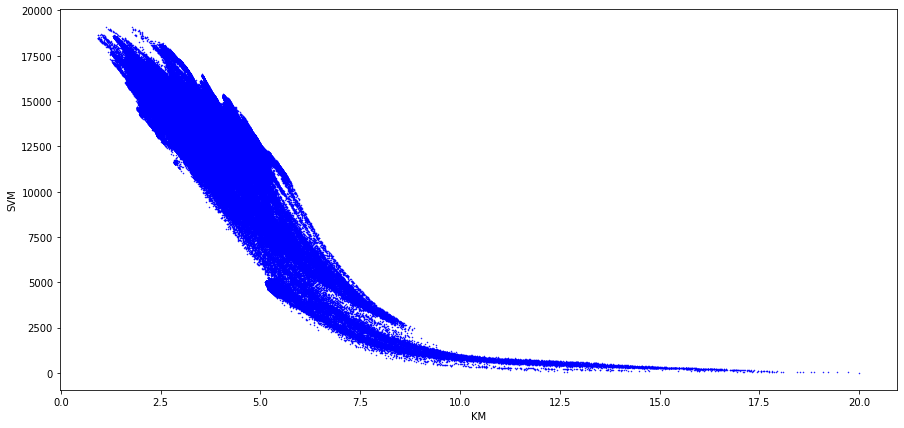

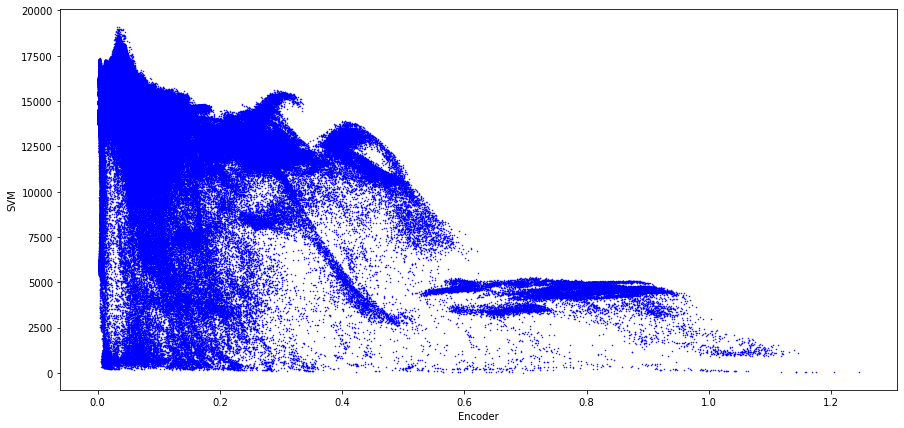

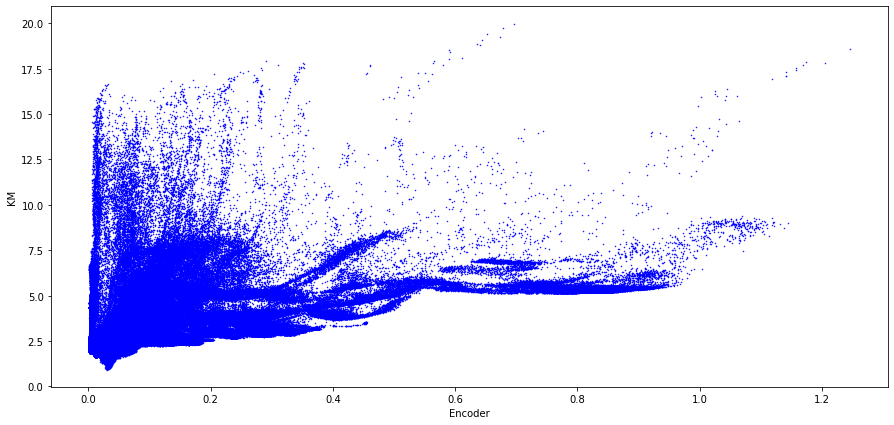

In [36]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']




plt.subplots(figsize=(15,7))
  
plt.plot(corr['KM_cluster_distance'],corr['SVM_score'],'b.',markersize=1 )
plt.xlabel('KM')
plt.ylabel('SVM')
plt.show()


plt.subplots(figsize=(15,7))
  
plt.plot(corr['AutoEnc_loss'],corr['SVM_score'],'b.' ,markersize=1 )
plt.xlabel('Encoder')
plt.ylabel('SVM')
plt.show()

plt.subplots(figsize=(15,7))
  
plt.plot(corr['AutoEnc_loss'],corr['KM_cluster_distance'],'b.' ,markersize=1 )
plt.xlabel('Encoder')
plt.ylabel('KM')
plt.show()

# Continuing with Autoencoder

**Though there is some visual anomaly simularity between the algorithms, the clustering algorithms give us much noise and not much to work on. On the other hand the autoencoder has a almost certain run to failure point. We can´t conclude with absolute certainty that components were changed after the highest loss peak, but it is much possible.**

**Furthermore, we will now analyze the loss of the encoder by month, with the thresholds.**  

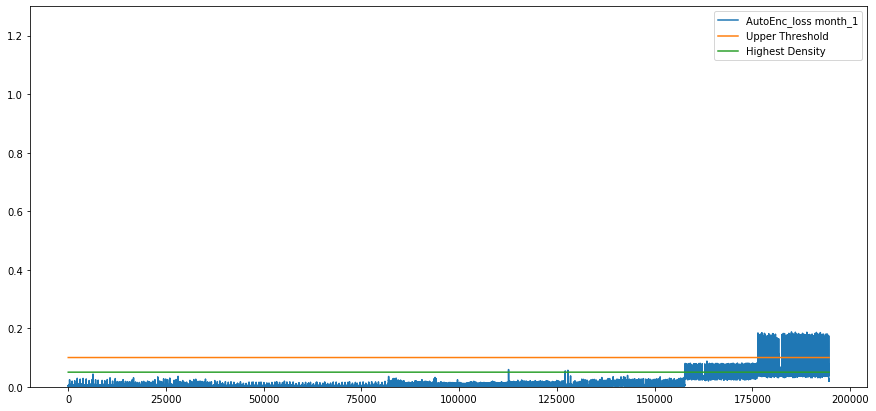

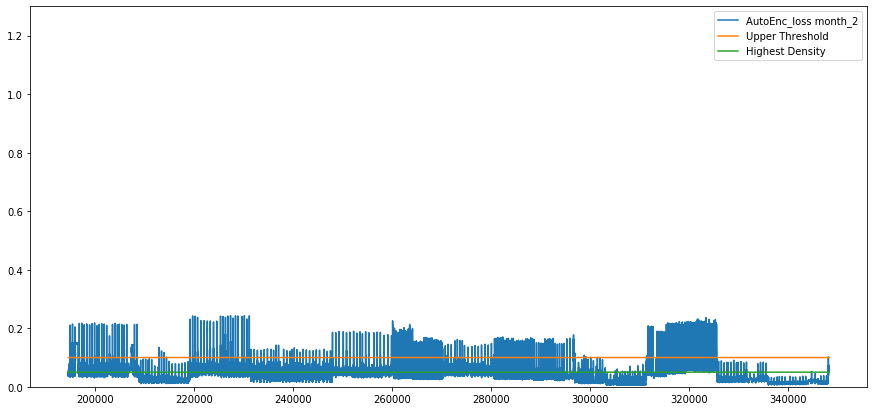

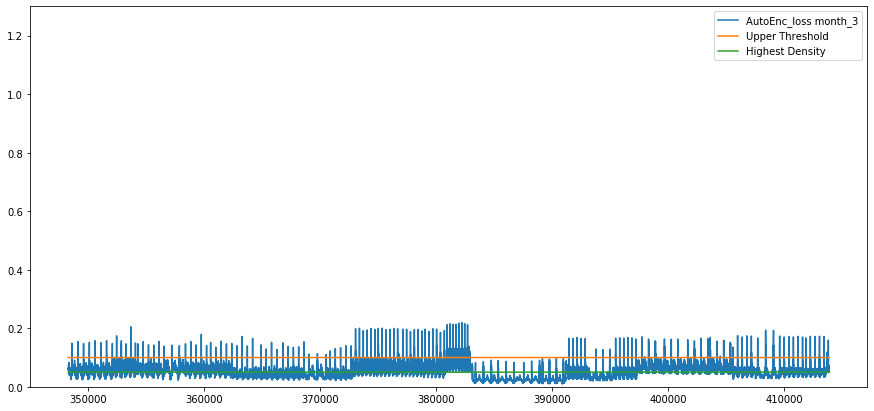

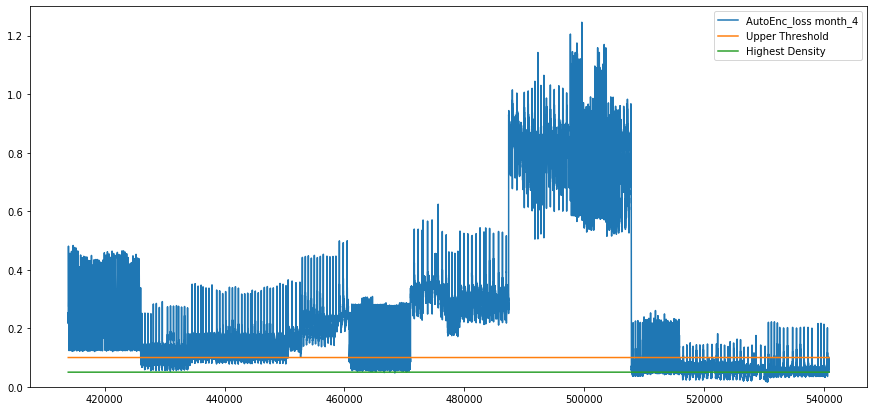

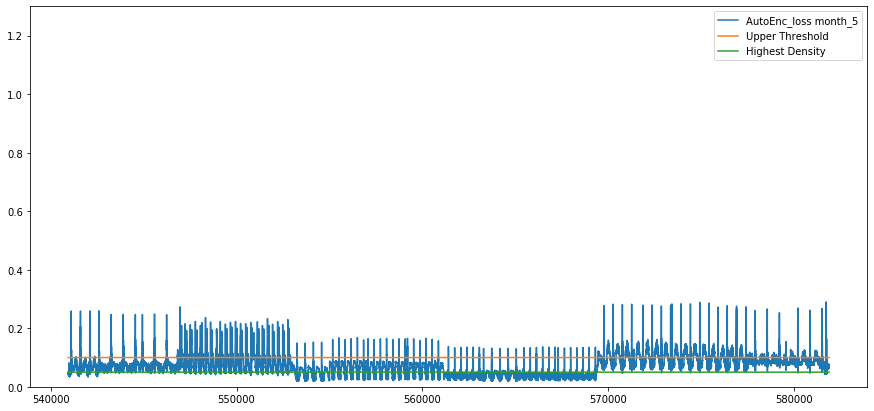

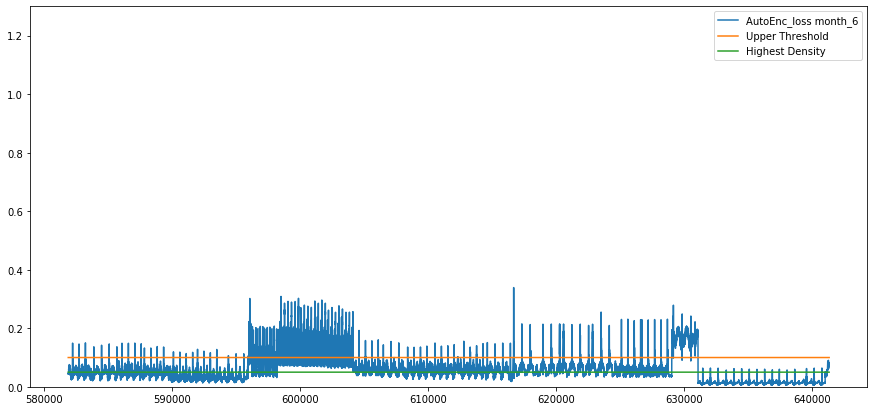

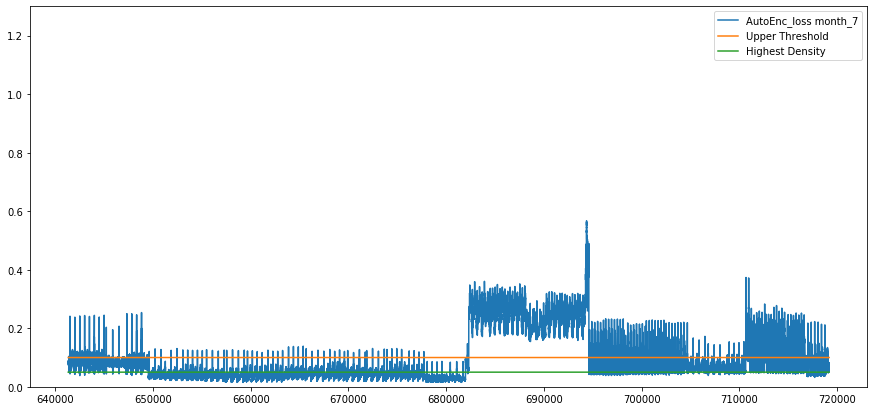

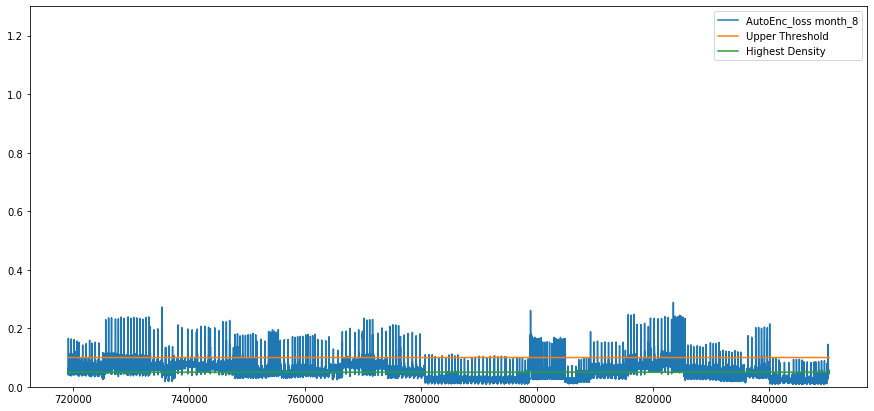

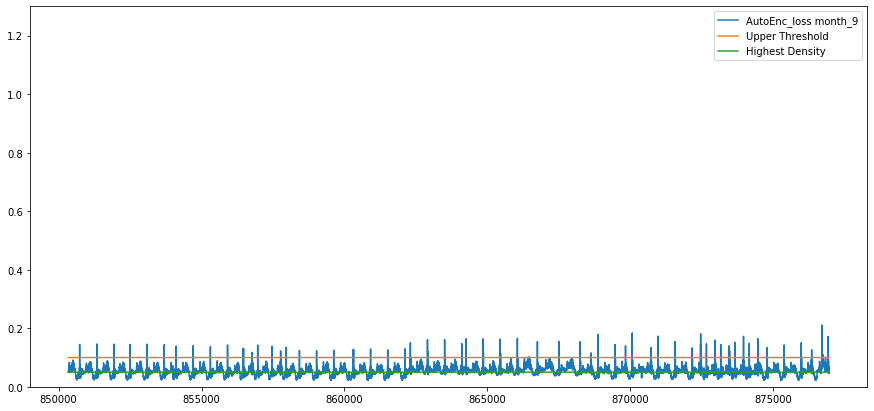

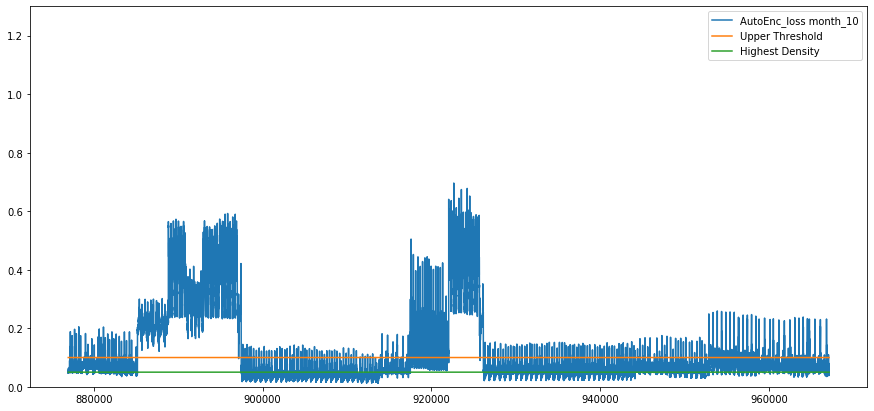

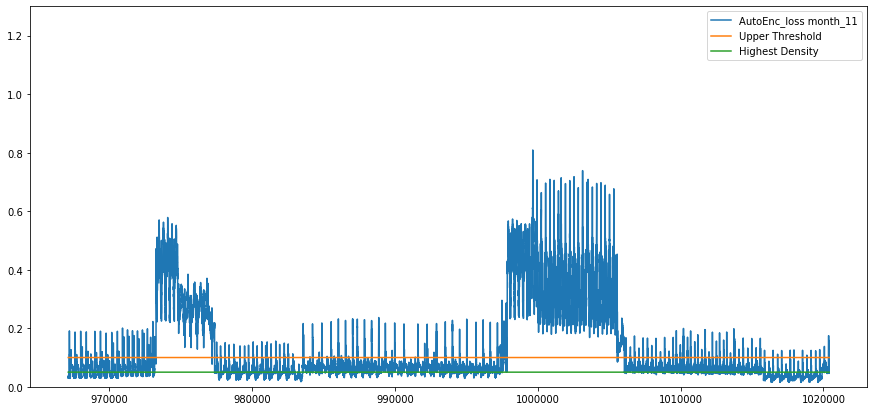

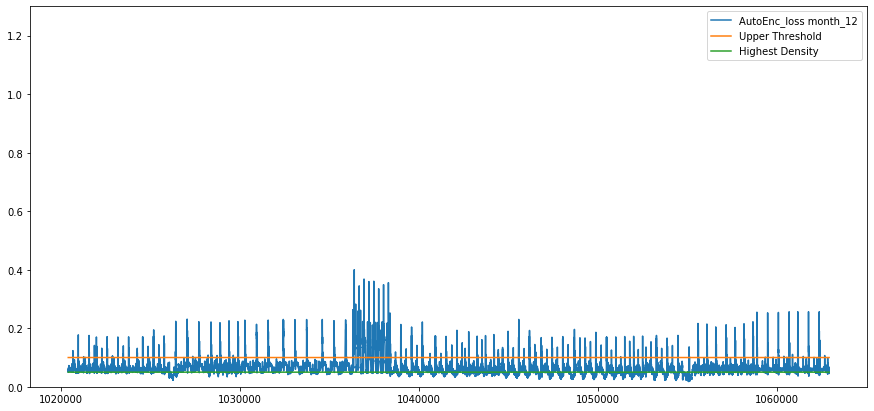

In [2]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']

main_df = pd.read_csv('compiled_df//One_year_compiled.csv')



#Passing encoder loss to main dataframe, to make it easier to separate by month
main_df['AutoEnc_loss'] = corr['AutoEnc_loss']

#Getting list of months
months = main_df['month'].dropna().unique()

#Looping through every month
for month in months:
    #Grabbing the slice of the dataframe for each month 
    month_df = main_df.groupby('month').get_group(month)
    
    
    # Array Thresholds
    upper_threshold = np.full((month_df['AutoEnc_loss'].size, 1), 0.1)
    high_density_threshold = np.full((month_df['AutoEnc_loss'].size, 1), 0.05)

    #Plot
    plt.subplots(figsize=(15,7))
    plt.plot(month_df.index, month_df['AutoEnc_loss'], label=f'AutoEnc_loss month_{month}')
    plt.plot(month_df.index, upper_threshold, label = 'Upper Threshold')
    plt.plot(month_df.index, high_density_threshold, label = 'Highest Density')
    plt.legend(loc='upper right')
    plt.ylim(0,1.3)
    
    plt.show()
    
    

**Now we will see Loss distribution by month**

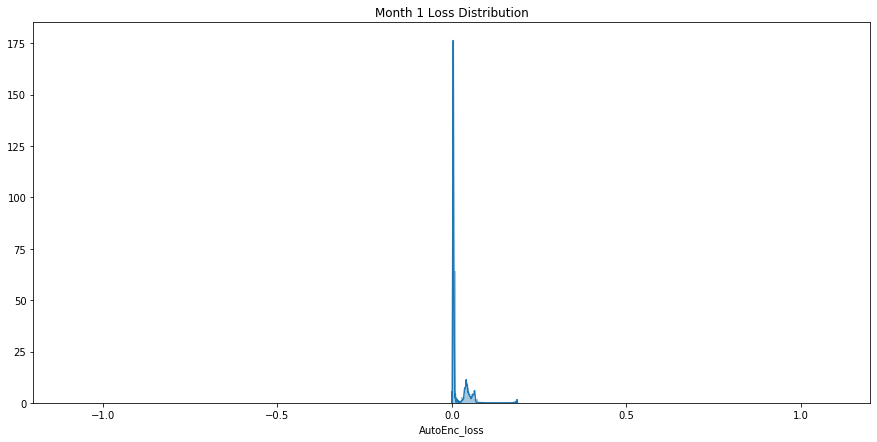

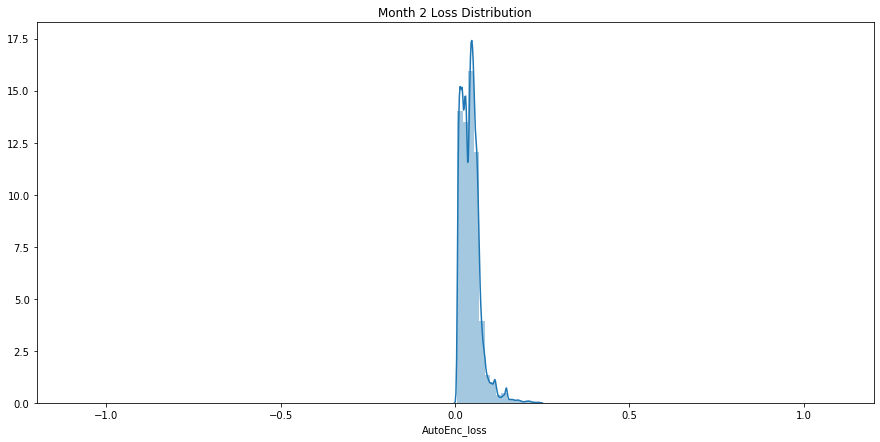

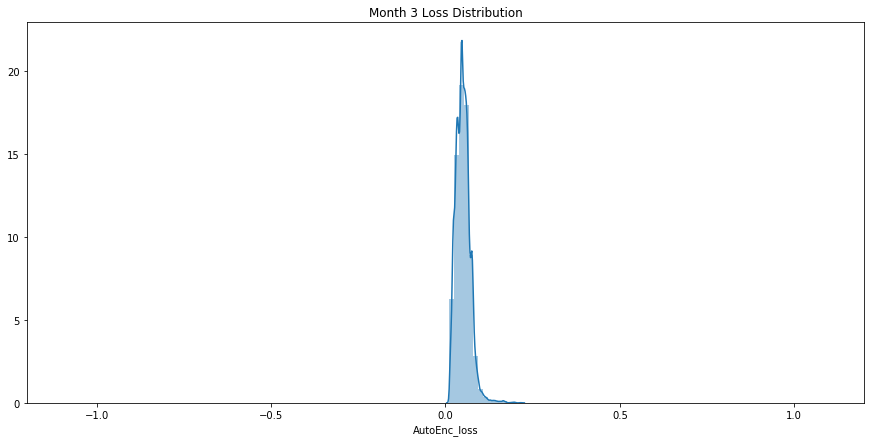

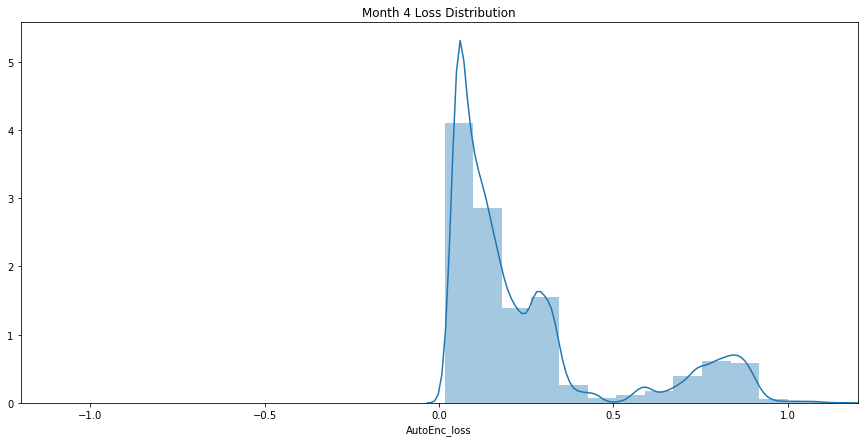

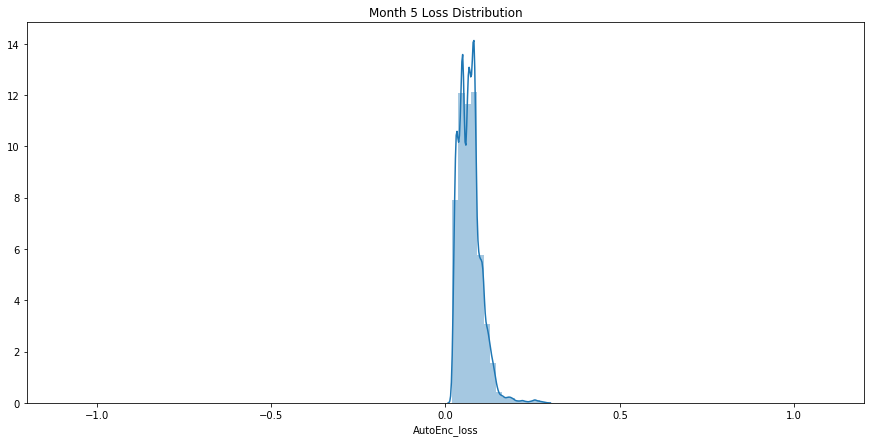

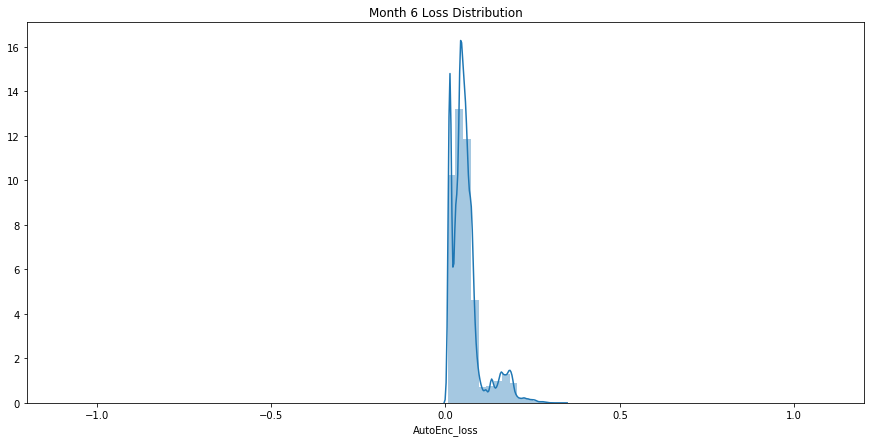

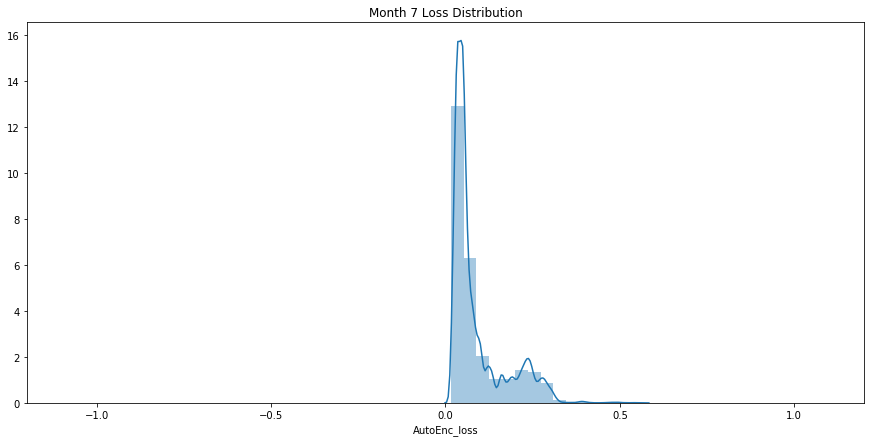

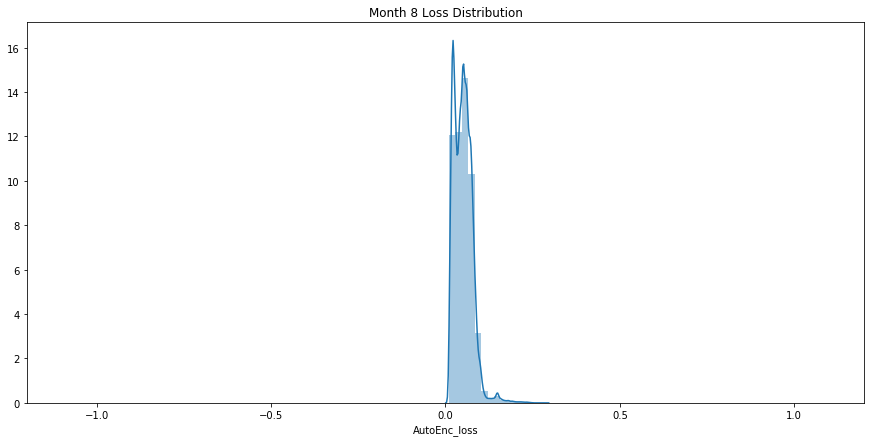

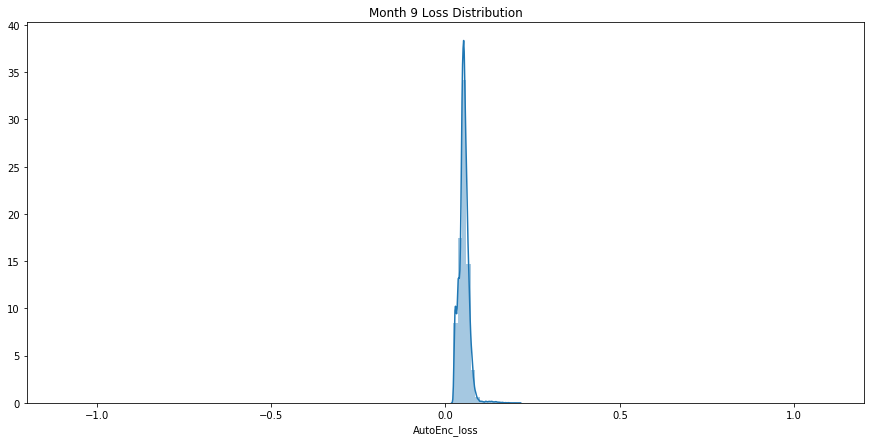

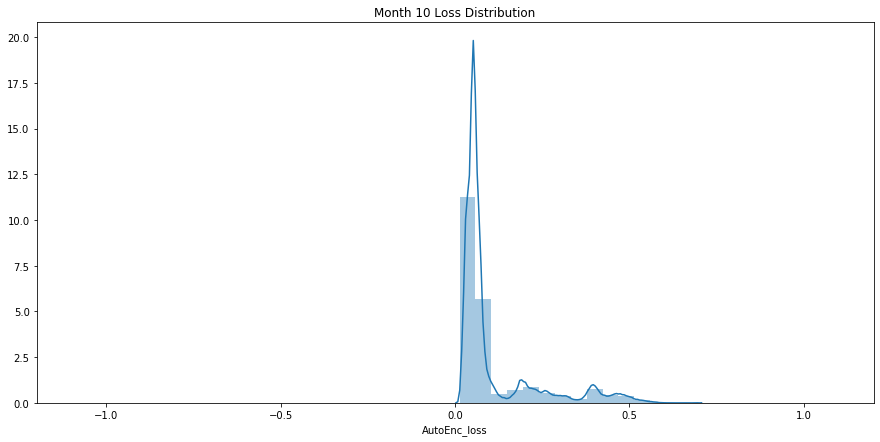

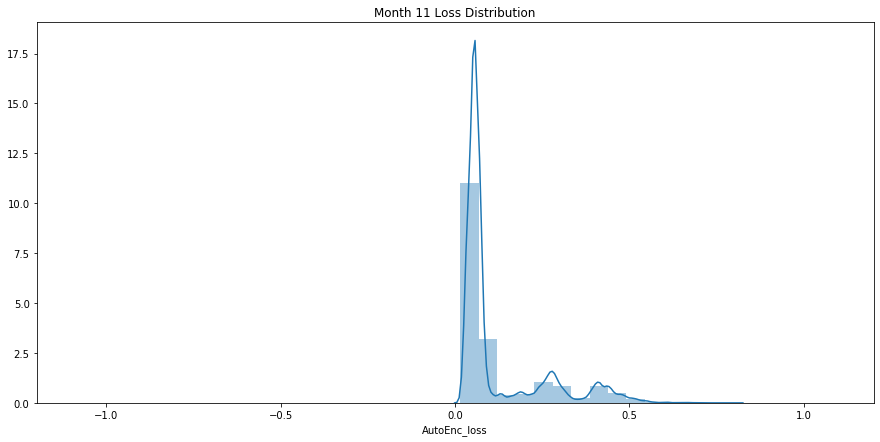

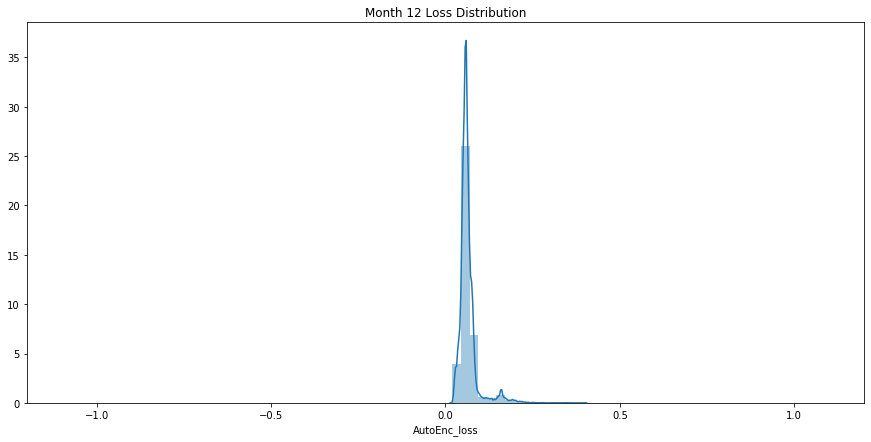

In [3]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']


main_df = pd.read_csv('compiled_df//One_year_compiled.csv')

main_df['AutoEnc_loss'] = corr['AutoEnc_loss']





months = main_df['month'].dropna().unique()

for month in months:
    month_df = main_df.groupby('month').get_group(month)
    
    
    
    plt.subplots(figsize=(15,7))
    sns.distplot((month_df['AutoEnc_loss']), bins=15).set_title(f'Month {month} Loss Distribution')
    #X axis limits
    plt.xlim([-1.2,1.2])
    plt.show()

    
    
    
    

**An interesting way to see the anomaly is the tail of the distribution. As we could see in the plot by month, month 4 has the highest anomaly point and counts. It's also obervable the influence of that in the distribution of the loss. Maybe by looking at the Kurtosis of each month we can get more info.**

**Kurtosis will tell us about the shape of the distribution. High kurtosis means that alot of data points have the same value, and that the tails or the standard deviation is realy small or non existent (in our case, many datapoints close to 0 means a nice condition of the machine). Low Kurtosis means we have lots of spread out datapoints, which gives the distribution wide fat tails, almost the size of it´s peak.** 

In [14]:
k_anomaly = pd.read_csv('compiled_df//KM_Distance.csv')
score = pd.read_csv('compiled_df//SVM_Score.csv')
enc_loss = pd.read_csv('compiled_df//AutoEncoder_loss.csv')

corr = pd.DataFrame()
corr['SVM_score'] = score['score']
corr['KM_cluster_distance'] = k_anomaly['0']
corr['AutoEnc_loss'] = enc_loss['Loss_mae']

main_df = pd.read_csv('compiled_df//One_year_compiled.csv')

main_df['AutoEnc_loss'] = corr['AutoEnc_loss']


months = main_df['month'].dropna().unique()

for month in months:
    month_df = main_df.groupby('month').get_group(month)
    kurt = (month_df['AutoEnc_loss']).kurtosis()
    print(f'Month {month} kurtosis = {kurt}')

Month 1 kurtosis = 5.905209401266553
Month 2 kurtosis = 5.937138485503365
Month 3 kurtosis = 4.285537495036374
Month 4 kurtosis = 0.9455247699324056
Month 5 kurtosis = 4.510143336927001
Month 6 kurtosis = 3.8201513892403636
Month 7 kurtosis = 1.9795239625157577
Month 8 kurtosis = 4.817953133797834
Month 9 kurtosis = 8.583822668974324
Month 10 kurtosis = 3.000952353094135
Month 11 kurtosis = 1.842456002553691
Month 12 kurtosis = 16.948971694197393


**So months with low kurtosis are the months with more anomalies, which can tell us a little about the condition of the machine.**

**We won't be moving on with this distribution analyses approach, for I personaly don't know much about distribution analyses. _But it maybe a very interesting approach to analyze the data_.** 

# Sensor detection

**Now that we know where the machine has a problem, we will try to find which component/sensor is causing this disturbance in the autoencoder. For that we will train it again, and get it´s predictions and losses for each column to see which one has the highest contribution to the total loss.**

In [25]:
main_df = pd.read_csv('compiled_df//One_year_compiled.csv')
main_df = main_df.drop(['day', 'hour', 'sample_Number', 'month', 'timestamp'], axis=1)
main_df = handle_non_numeric(main_df)
X = main_df

scaler = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), 
                              columns=X.columns, 
                              index=X.index)



X = preprocessing.scale(X)


train_percentage = 0.15
train_size = int(len(main_df.index)*train_percentage)

X_train = X[:train_size]

seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(50,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(50,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=50
BATCH_SIZE=200

history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1)

Train on 143492 samples, validate on 15944 samples
Epoch 1/50
143492/143492 [==============================] - 3s 20us/step - loss: 0.0952 - val_loss: 0.0124
Epoch 2/50
143492/143492 [==============================] - 2s 17us/step - loss: 0.0024 - val_loss: 0.0088
Epoch 3/50
143492/143492 [==============================] - 3s 21us/step - loss: 0.0011 - val_loss: 0.0078
Epoch 4/50
143492/143492 [==============================] - 2s 14us/step - loss: 6.9314e-04 - val_loss: 0.0055
Epoch 5/50
143492/143492 [==============================] - 2s 13us/step - loss: 4.9385e-04 - val_loss: 0.0044
Epoch 6/50
143492/143492 [==============================] - 2s 15us/step - loss: 3.8783e-04 - val_loss: 0.0040
Epoch 7/50
143492/143492 [==============================] - 3s 18us/step - loss: 3.1528e-04 - val_loss: 0.0036
Epoch 8/50
143492/143492 [==============================] - 2s 15us/step - loss: 2.5863e-04 - val_loss: 0.0030
Epoch 9/50
143492/143492 [==============================] - 2s 14us/step 

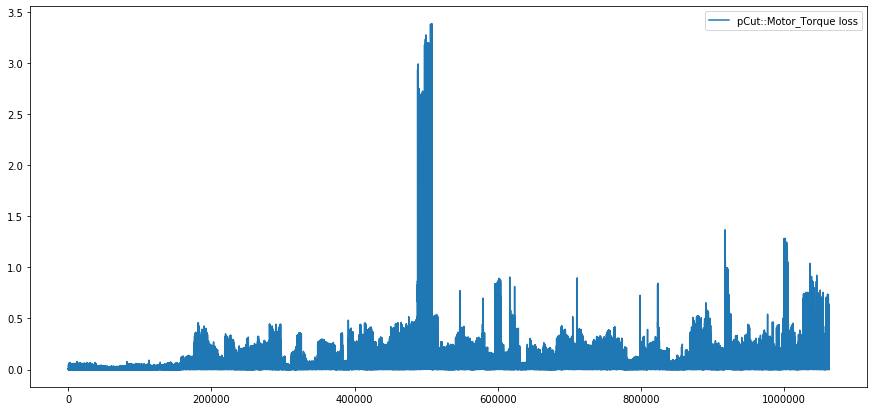

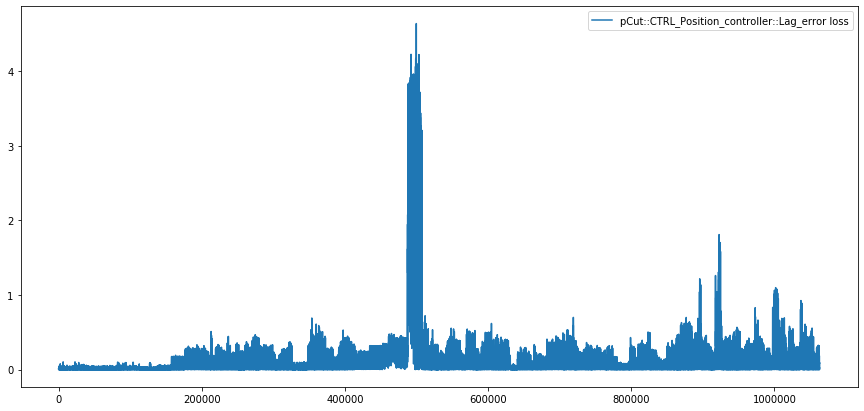

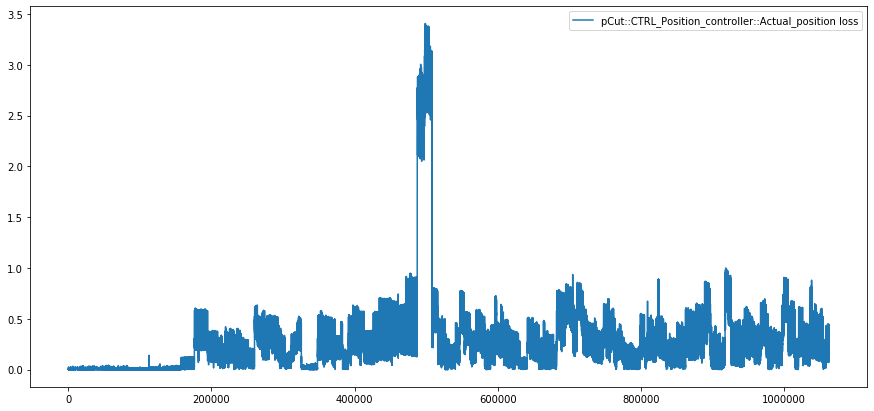

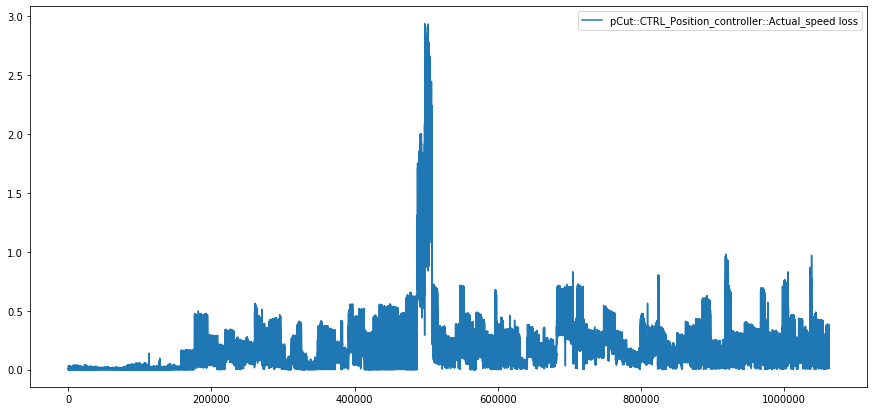

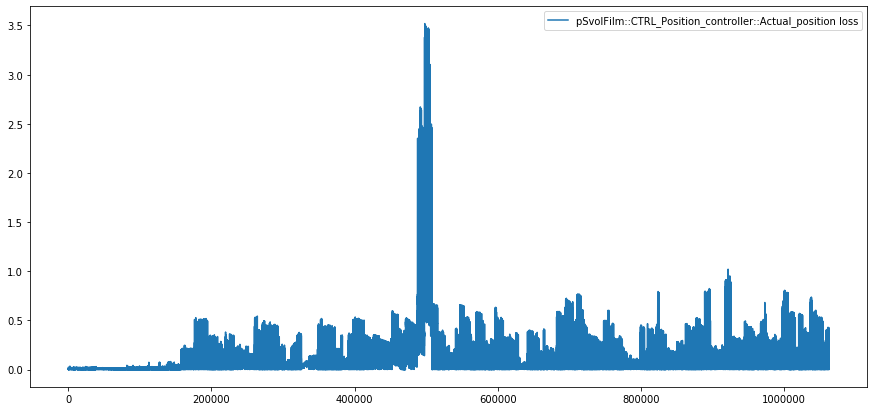

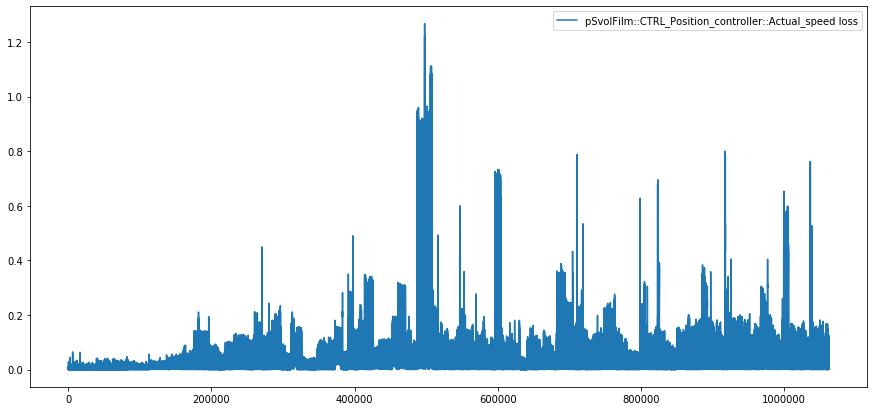

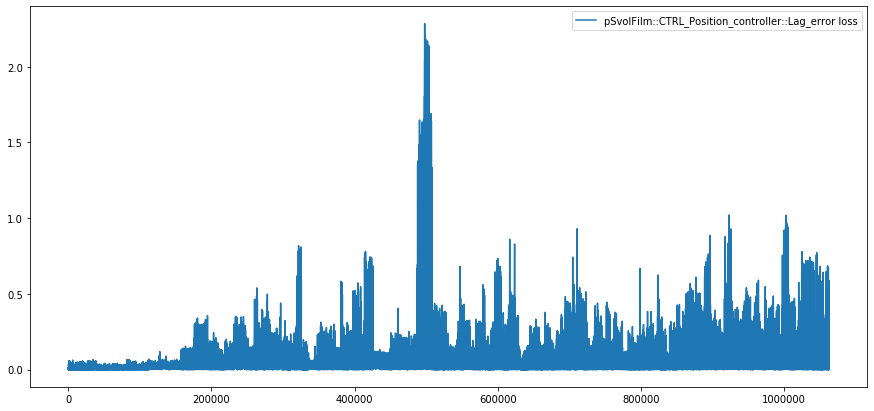

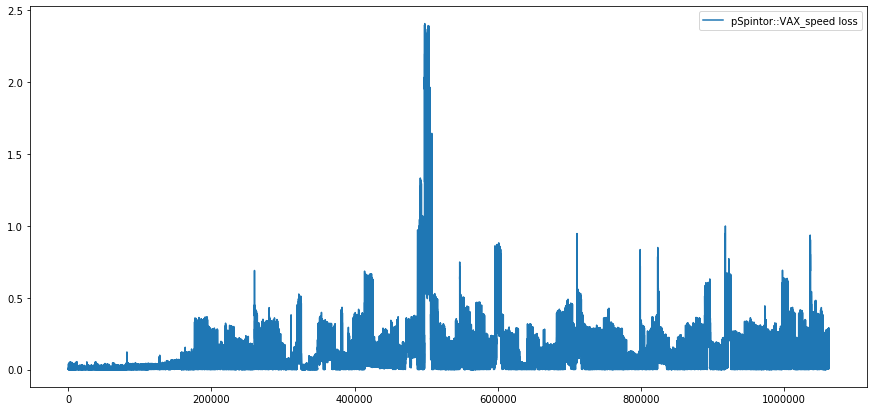

In [26]:
#Predicting and passing prediction to dataframe
X_pred = model.predict(np.array(X))
X_pred = pd.DataFrame(X_pred,columns=main_df.columns)
X_pred.index = pd.DataFrame(main_df).index

#Passing X from an array to a dataframe
X = pd.DataFrame(X,columns=main_df.columns)
X.index = pd.DataFrame(main_df).index

#Dataframe where all the loss per columns will go
loss_df = pd.DataFrame()

#Dropping mode as it can't logically contribute to degredation
main_df.drop('mode',axis=1, inplace=True)

#Iterating through columns
for column in main_df.columns:
    #Getting the loss of the prediction for that column
    loss_df[f'{column}'] = (X_pred[f'{column}'] - X[f'{column}']).abs()
     
    #Plotting the loss
    plt.subplots(figsize=(15,7))
    plt.plot(loss_df.index, loss_df[f'{column}'], label=f'{column} loss')
    plt.legend(loc='upper right')
    
    plt.show()

#Saving loss Dataframe
loss_df.to_csv('compiled_df//AutoEncoder_loss_p_column.csv')

**Now we will apply Softmax function to each row so we can get the percentage that each colunm contributes to the total loss. As for the sum of each row will give us 1.**

In [17]:
sftmax_df = pd.read_csv('compiled_df//AutoEncoder_loss_p_column.csv', index_col=0)
sftmax_df = softmax(sftmax_df, axis=1)
sftmax_df.describe()

pCut::Motor_Torque  pCut::CTRL_Position_controller::Lag_error  \
count        1.062912e+06                               1.062912e+06   
mean         1.204693e-01                               1.228772e-01   
std          1.156266e-02                               1.106904e-02   
min          1.865649e-02                               1.793434e-02   
25%          1.188391e-01                               1.192631e-01   
50%          1.228176e-01                               1.230697e-01   
75%          1.249319e-01                               1.253738e-01   
max          4.107637e-01                               5.458792e-01   

       pCut::CTRL_Position_controller::Actual_position  \
count                                     1.062912e+06   
mean                                      1.397278e-01   
std                                       4.686768e-02   
min                                       9.833109e-02   
25%                                       1.249067e-01   
50%                                       1.306992e-01   
75%                                       1.383531e-01   
max                                       6.134586e-01   

       pCut::CTRL_Position_controller::Actual_speed  \
count                                  1.062912e+06   
mean                                   1.308415e-01   
std                                    1.284813e-02   
min                                    1.357752e-02   
25%                                    1.248310e-01   
50%                                    1.289261e-01   
75%                                    1.359647e-01   
max                                    3.269753e-01   

       pSvolFilm::CTRL_Position_controller::Actual_position  \
count                                       1.062912e+06      
mean                                        1.240942e-01      
std                                         1.282596e-02      
min                                         3.297161e-02      
25%                                         1.204438e-01      
50%                                         1.249669e-01      
75%                                         1.288158e-01      
max                                         3.202893e-01      

       pSvolFilm::CTRL_Position_controller::Actual_speed  \
count                                       1.062912e+06   
mean                                        1.192652e-01   
std                                         1.204172e-02   
min                                         5.295062e-03   
25%                                         1.170258e-01   
50%                                         1.220746e-01   
75%                                         1.249192e-01   
max                                         1.681255e-01   

       pSvolFilm::CTRL_Position_controller::Lag_error  pSpintor::VAX_speed  
count                                    1.062912e+06         1.062912e+06  
mean                                     1.198906e-01         1.228342e-01  
std                                      1.245117e-02         1.192981e-02  
min                                      1.148547e-02         1.280443e-02  
25%                                      1.175876e-01         1.207791e-01  
50%                                      1.222299e-01         1.247807e-01  
75%                                      1.249983e-01         1.264754e-01  
max                                      2.141893e-01         2.156039e-01

**Plotting the percentage of each columns contribution to total loss**

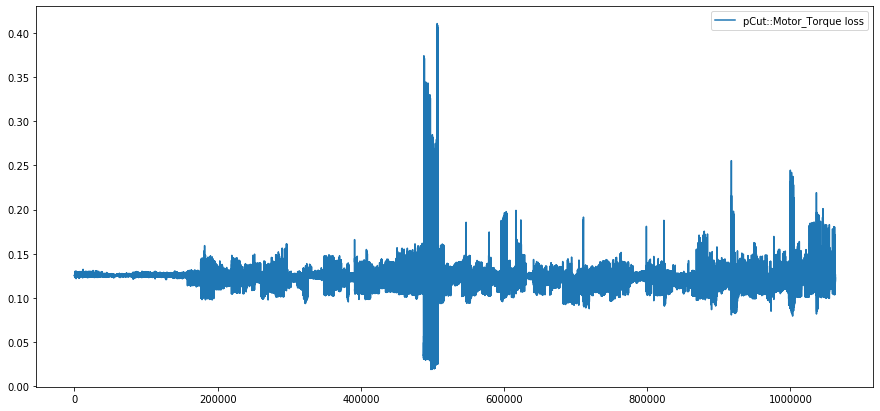

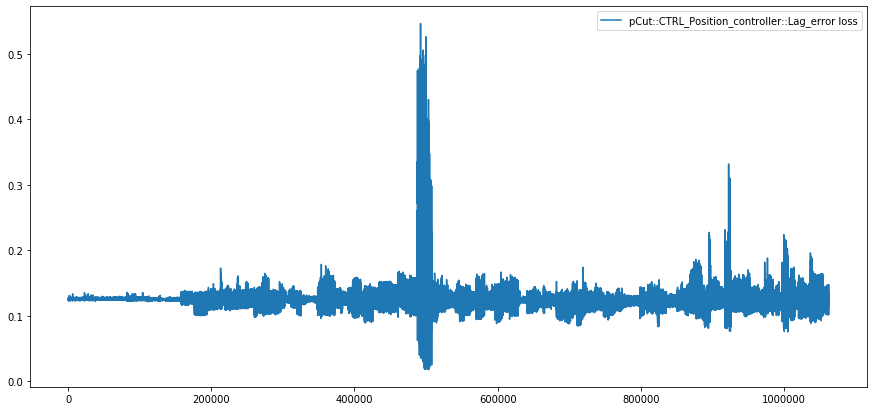

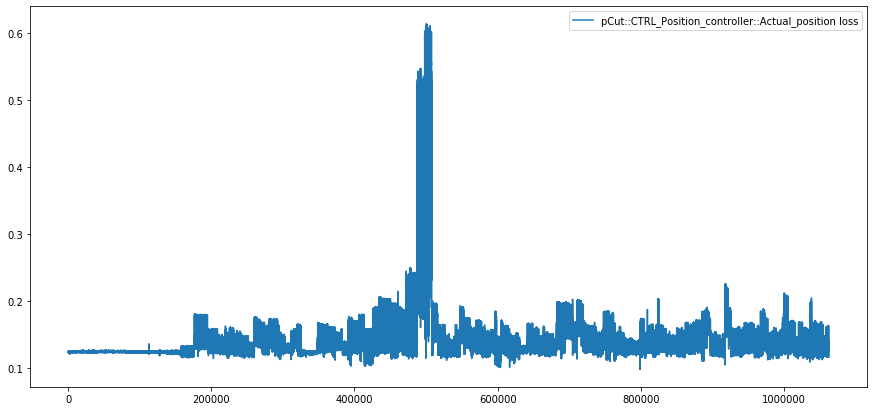

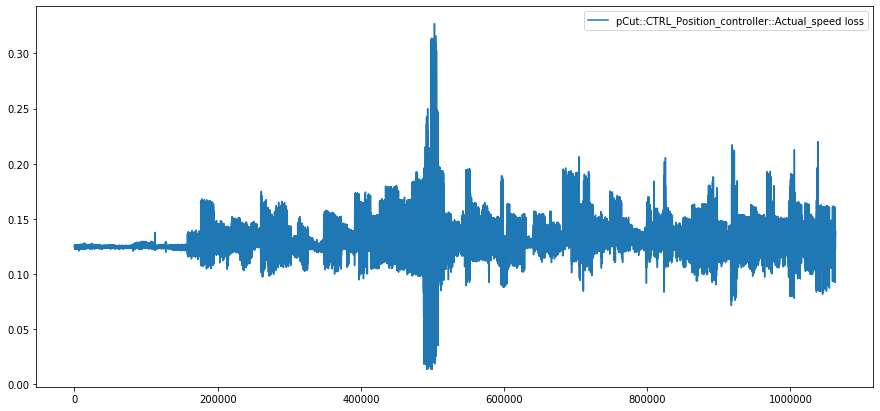

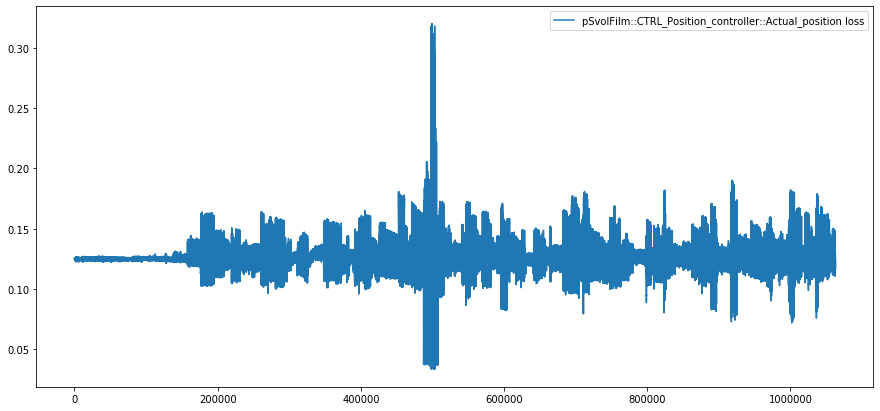

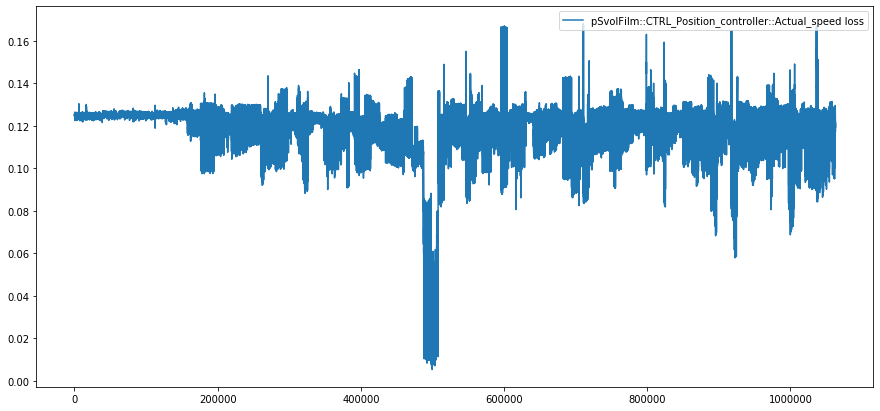

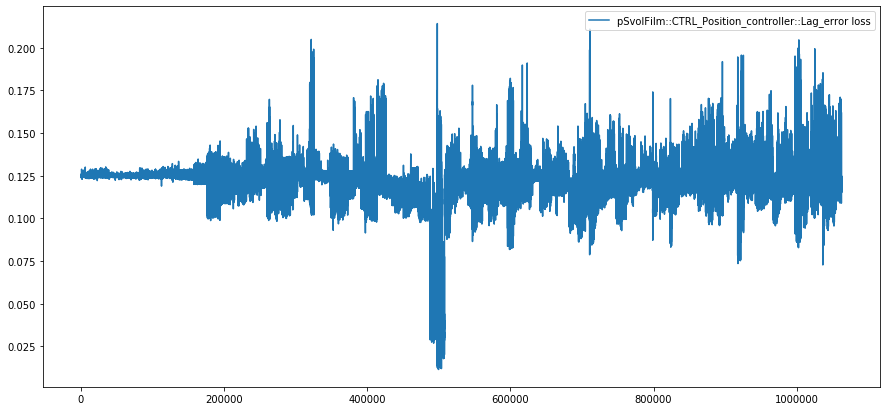

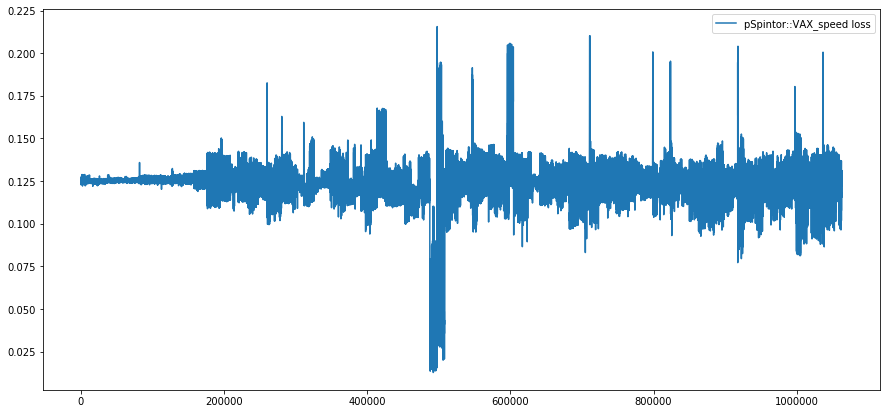

In [5]:
for column in sftmax_df.columns:
    

    plt.subplots(figsize=(15,7))
    plt.plot(sftmax_df.index, sftmax_df[f'{column}'], label=f'{column} loss')
    plt.legend(loc='upper right')
    
    plt.show()

**Now we can plot a stack plot to better visualize the contribution of each column to the total loss. As you will see the Blades position contributes very much to the total loss on that peak we saw. We will look in closer to that slice.**

(0, 1)

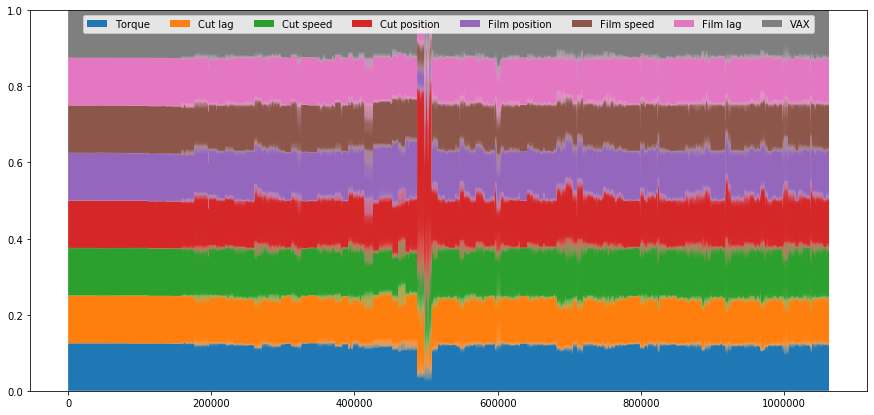

In [6]:
plt.subplots(figsize=(15,7))

#Labels for stackbar plot
df_label = ['Torque', 'Cut lag','Cut speed','Cut position','Film position','Film speed','Film lag','VAX']

#Stackbar plot
plt.stackplot(sftmax_df.index, sftmax_df['pCut::Motor_Torque'],
             sftmax_df['pCut::CTRL_Position_controller::Lag_error'],
             sftmax_df['pCut::CTRL_Position_controller::Actual_speed'],
              sftmax_df['pCut::CTRL_Position_controller::Actual_position'],
             sftmax_df['pSvolFilm::CTRL_Position_controller::Actual_position'],
             sftmax_df['pSvolFilm::CTRL_Position_controller::Actual_speed'],
             sftmax_df['pSvolFilm::CTRL_Position_controller::Lag_error'],
             sftmax_df['pSpintor::VAX_speed'],
             labels = df_label)

plt.legend(loc='upper center', ncol=8)

plt.ylim(0,1)

(0, 1)

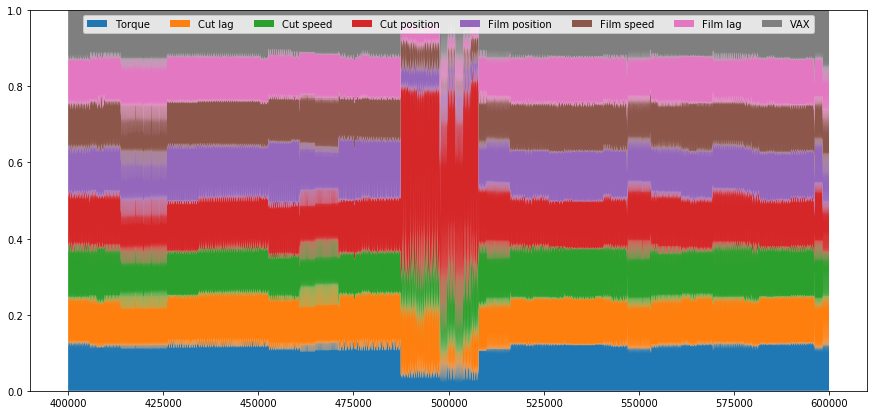

In [8]:
plt.subplots(figsize=(15,7))

df_label = ['Torque', 'Cut lag','Cut speed','Cut position','Film position','Film speed','Film lag','VAX']

#Grabbing the slice where the larger anomaly is
sftmax_df = sftmax_df[400000:600000]

plt.stackplot(sftmax_df.index, sftmax_df['pCut::Motor_Torque'],
             sftmax_df['pCut::CTRL_Position_controller::Lag_error'],
             sftmax_df['pCut::CTRL_Position_controller::Actual_speed'],
              sftmax_df['pCut::CTRL_Position_controller::Actual_position'],
             sftmax_df['pSvolFilm::CTRL_Position_controller::Actual_position'],
             sftmax_df['pSvolFilm::CTRL_Position_controller::Actual_speed'],
             sftmax_df['pSvolFilm::CTRL_Position_controller::Lag_error'],
             sftmax_df['pSpintor::VAX_speed'],
             labels = df_label)

plt.legend(loc='upper center', ncol=8)

plt.ylim(0,1)

**Looks like the Lag Error for the blade also gives a big slice of the total loss. The possible explanation here is that the blade is worn, and for that, it's starting to deviate from the path the machine tries to trace for the blade when cutting the film.**

**Now we will look into the distribution of the contribution of each column to teh total loss, Just to get a better grasp of which sensors are giving higher loss.**

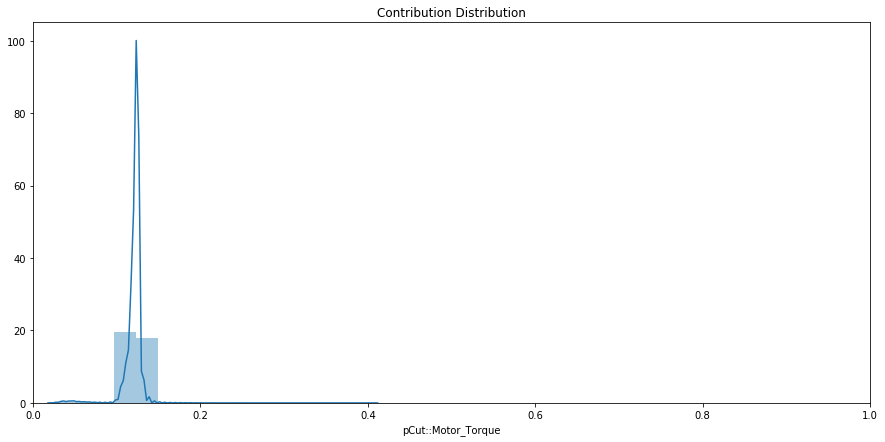

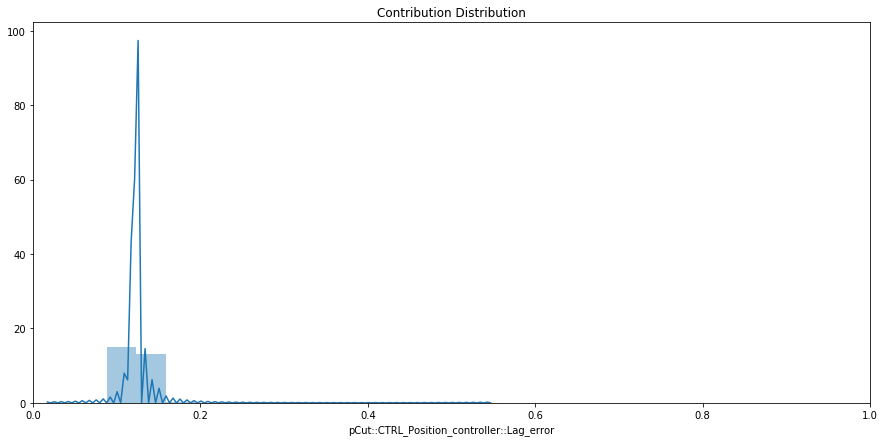

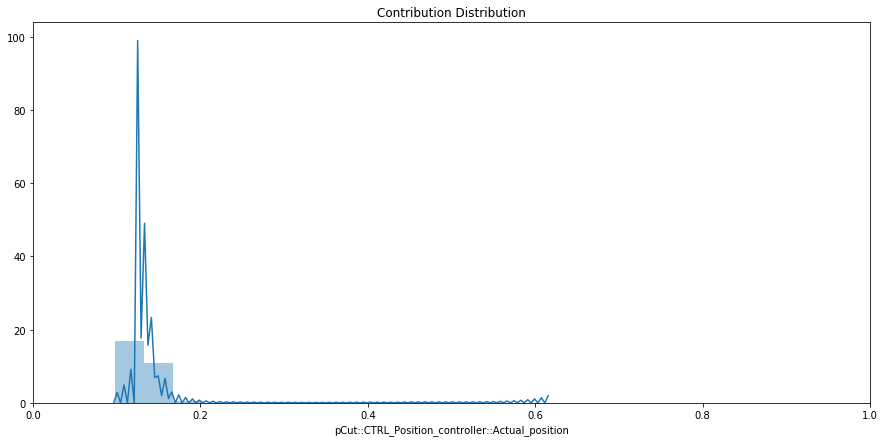

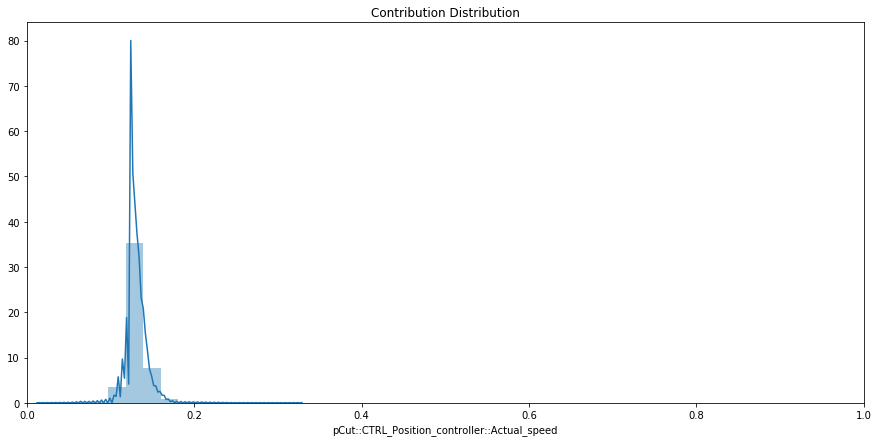

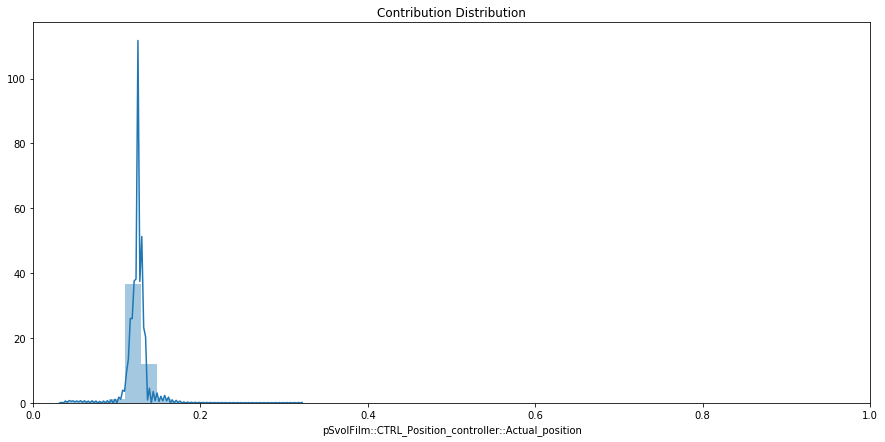

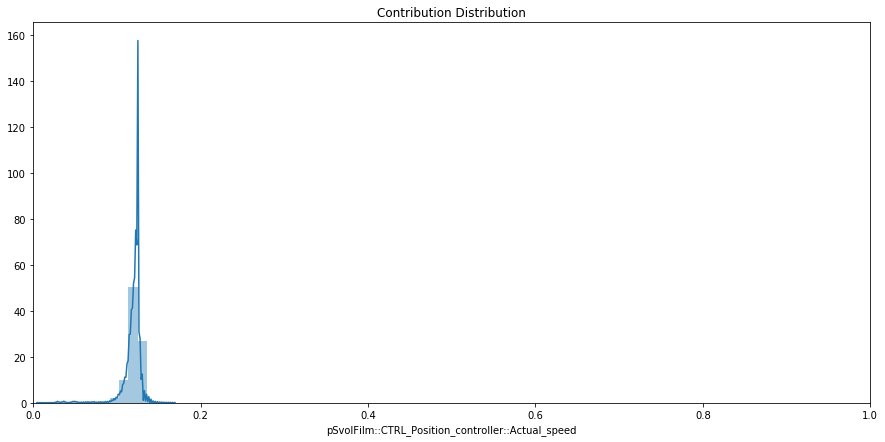

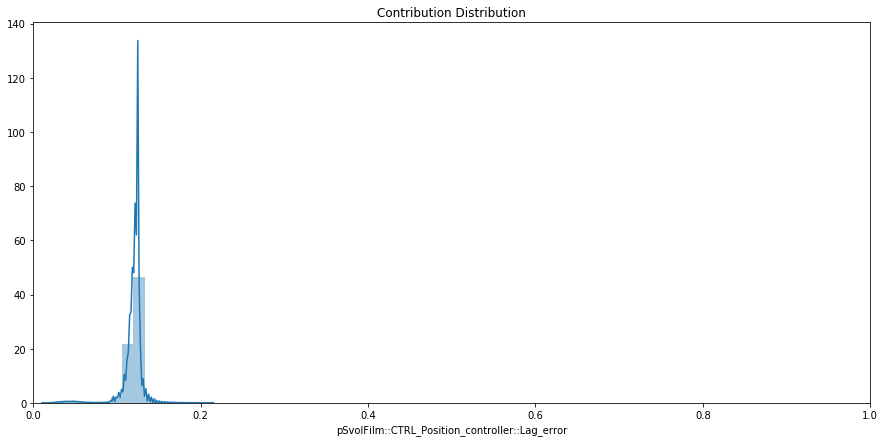

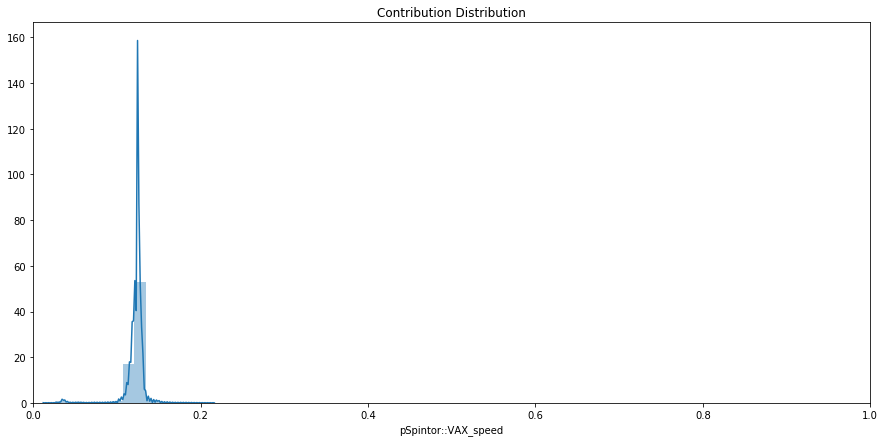

In [22]:
for column in sftmax_df.columns:
    

    plt.subplots(figsize=(15,7))
    
    sns.distplot(( sftmax_df[f'{column}']), bins=15).set_title(f'Contribution Distribution')
    plt.xlim(0,1)
    
    plt.show()

# Conclusion 

**With all the info gathered we could tell where and when the machine suffered massive degradation. We could also tell which of the measurments contributes more to the loss on the whole year of the machine, which tells us these components made need more attention. Percentile thresholds, Distribution anomaly analyses, SVMs and much more other methods can be used for the detection of component wear over time with the info given here.**

**A problem with this method is the need to preprocess and scale data entirely to be then given to the algorithm. A way to overcome this problem is to use this dataset or a slice of it and combine it with a new slice of data for system health analyses. And for each new slice of data that needs analyzing, we remove the previous added slice, and keep this dataset intact.** 

# References

**-- https://www.sciencedirect.com/science/article/pii/S221282711830307X**

**-- https://towardsdatascience.com/machine-learning-for-anomaly-detection-and-condition-monitoring-d4614e7de770**

